In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from statistics import mean
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import itertools

In [2]:

path_0 = Path(r'C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv')

author = ['Poe','Twain','AB']
type_ = ['story']

choice = [0,1,2]

#index_i = 0
#index_j = 1

#path = str(path_0) + str('/') + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])
#print(path)

path_list = []
for index_i in range(len(author)):
    for index_j in range(len(type_)):
        path = str(path_0) + str('/') + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])
        path_list.append(path)
        print(index_i,index_j, path_list)

0 0 ['C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Poe-story']
1 0 ['C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Poe-story', 'C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Twain-story']
2 0 ['C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Poe-story', 'C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Twain-story', 'C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/AB-story']


In [3]:
for i in range(len(author)*len(type_)):
    print(i, path_list[i])

0 C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv/Poe-story
1 C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv/Twain-story
2 C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv/AB-story


In [4]:
new_dir_path_csv = 'csv/' + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])
new_dir_path_png = 'png/' + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])

author_type = str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])

new_dir_path_png_top = 'png/' + author_type + '/top_ranking'
new_dir_path_png_top_no_punc = 'png/' + author_type + '/top_ranking_no_punc'
new_dir_path_png_top_no_punc_no_stopwords = 'png/' + author_type + '/top_ranking_no_punc_no_stopwords'
new_dir_path_png_dispersion_plot = 'png/' + author_type + '/dispersion_plot'
new_dir_path_png_biagram_plot  = 'png/' + author_type + '/biagram_plot'

new_dir_path_png_Combi_n_2 = 'png/' + 'poe_story_vs_others_stories_test02' + '/combi_n_2_plot'
new_dir_path_png_Mahalanobis = 'png/' + 'poe_story_vs_others_stories_test02' + '/Mahalanobis_plot'
new_dir_path_png_decom_dim2 = 'png/' + 'poe_story_vs_others_stories_test02' + '/decom_dim2_plot'
new_dir_path_png_decom_dim2_EM = 'png/' + 'poe_story_vs_others_stories_test02' + '/decom_dim2_EM_plot'

def my_makedirs(path):
    if not os.path.isdir(path):
        os.makedirs(path)

my_makedirs(new_dir_path_csv)
my_makedirs(new_dir_path_png)
my_makedirs(new_dir_path_png_top)
my_makedirs(new_dir_path_png_top_no_punc)
my_makedirs(new_dir_path_png_top_no_punc_no_stopwords)

my_makedirs(new_dir_path_png_dispersion_plot)
my_makedirs(new_dir_path_png_biagram_plot)

my_makedirs(new_dir_path_png_Combi_n_2)
my_makedirs(new_dir_path_png_Mahalanobis)

my_makedirs(new_dir_path_png_decom_dim2)
my_makedirs(new_dir_path_png_decom_dim2_EM)

In [5]:
new_dir_path_csv, new_dir_path_png, new_dir_path_png_top, new_dir_path_png_top_no_punc, new_dir_path_png_top_no_punc_no_stopwords,new_dir_path_png_dispersion_plot, new_dir_path_png_biagram_plot

('csv/AB-story',
 'png/AB-story',
 'png/AB-story/top_ranking',
 'png/AB-story/top_ranking_no_punc',
 'png/AB-story/top_ranking_no_punc_no_stopwords',
 'png/AB-story/dispersion_plot',
 'png/AB-story/biagram_plot')

In [6]:
#path = Path(r'C:\Users\tsuka\Desktop\csv')
#path = Path(r'C:\Users\SI\Python_ML\NLTK_\csv\Poe-story')
path = Path(path)
path
path.glob('*.csv')
list(path.glob('*.csv'))
print('lists:', path.glob('*.csv'))
#list path
path = list(path.glob('*.csv'))
path

lists: <generator object Path.glob at 0x0000028A74B877C8>


[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/AB-story/AB_story_to_csv_output_nor.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/AB-story/AB_story_to_csv_output_original.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/AB-story/AB_story_to_csv_output_percentage.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/AB-story/AB_story_to_csv_output_std.csv')]

In [7]:
path_csv_list = []
for i in range(len(author)*len(type_)):
    path = Path(path_list[i])
    print("No.",i,"Path:", path)
    
    #list csv
    path.glob('*.csv')
    list(path.glob('*.csv'))
    #print('lists:', path.glob('*.csv'), '\n')
    
    #list csvs path
    path_csv = list(path.glob('*.csv'))
    path_csv_list.append(path_csv)
    
    print('\n', "No.",i,"path_csv_lists:", path_csv_list,'\n')

No. 0 Path: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story

 No. 0 path_csv_lists: [[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_nor.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_original.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_percentage.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_std.csv')]] 

No. 1 Path: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Twain-story

 No. 1 path_csv_lists: [[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_nor.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_original.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_percentage.csv'), W

In [8]:
path_csv_list

[[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_nor.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_original.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_percentage.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_std.csv')],
 [WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Twain-story/Twain_story_to_csv_output_nor.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Twain-story/Twain_story_to_csv_output_original.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Twain-story/Twain_story_to_csv_output_percentage.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Twain-story/Twain_story_to_csv_output_std.csv')],
 [WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk

In [9]:
data_test_ = pd.read_csv(path_csv_list[0][2], delimiter=',')
data_test_

,Unnamed: 0,and,the,that,of,upon,not,was,when,then,total
0,0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,1.0
1,1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,1.0
2,2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,1.0
3,3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,1.0
4,4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64,64,0.021457,0.097677,0.008583,0.042821,0.003079,0.005318,0.004385,0.004105,0.001959,1.0
65,65,0.017986,0.071343,0.012590,0.047362,0.002398,0.008393,0.002398,0.000600,0.001199,1.0
66,66,0.027301,0.061622,0.009880,0.036401,0.004940,0.007020,0.010400,0.003120,0.000780,1.0
67,67,0.025541,0.065368,0.012554,0.054545,0.004329,0.005195,0.014719,0.001299,0.000866,1.0


In [10]:
data_list = []
for i in range(len(author)*len(type_)):
    print("No.",i, "__Combination__:")
    for j in range(4):
        print('\n', "No.",i,"Path:",
              '\n',"No.",j,"path_csv_lists:",path_csv_list[i][j],'\n')
        data_i_j = pd.read_csv(path_csv_list[i][j], delimiter=',')
        data_list.append(data_i_j)
        print('length of datalists:',len(data_list))

No. 0 __Combination__:

 No. 0 Path: 
 No. 0 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story\Poe_story_to_csv_output_nor.csv 

length of datalists: 1

 No. 0 Path: 
 No. 1 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story\Poe_story_to_csv_output_original.csv 

length of datalists: 2

 No. 0 Path: 
 No. 2 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story\Poe_story_to_csv_output_percentage.csv 

length of datalists: 3

 No. 0 Path: 
 No. 3 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story\Poe_story_to_csv_output_std.csv 

length of datalists: 4
No. 1 __Combination__:

 No. 1 Path: 
 No. 0 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Twain-story\Twain_story_to_csv_output_nor.csv 

length of datalists: 5

 No. 1 Path: 
 No. 1 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Twain-story\Twain_story_to_csv_output_original.csv 

length of 

# Poe-letter  vs Twain-letter

In [11]:
# Poe-letter percentage
data_list[2]

,Unnamed: 0,and,the,that,of,upon,not,was,when,then,total
0,0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,1.0
1,1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,1.0
2,2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,1.0
3,3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,1.0
4,4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64,64,0.021457,0.097677,0.008583,0.042821,0.003079,0.005318,0.004385,0.004105,0.001959,1.0
65,65,0.017986,0.071343,0.012590,0.047362,0.002398,0.008393,0.002398,0.000600,0.001199,1.0
66,66,0.027301,0.061622,0.009880,0.036401,0.004940,0.007020,0.010400,0.003120,0.000780,1.0
67,67,0.025541,0.065368,0.012554,0.054545,0.004329,0.005195,0.014719,0.001299,0.000866,1.0


In [12]:
# Poe-letter
data_02 = pd.read_csv(path_csv_list[0][2], delimiter=',')
data_02

,Unnamed: 0,and,the,that,of,upon,not,was,when,then,total
0,0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,1.0
1,1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,1.0
2,2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,1.0
3,3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,1.0
4,4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64,64,0.021457,0.097677,0.008583,0.042821,0.003079,0.005318,0.004385,0.004105,0.001959,1.0
65,65,0.017986,0.071343,0.012590,0.047362,0.002398,0.008393,0.002398,0.000600,0.001199,1.0
66,66,0.027301,0.061622,0.009880,0.036401,0.004940,0.007020,0.010400,0.003120,0.000780,1.0
67,67,0.025541,0.065368,0.012554,0.054545,0.004329,0.005195,0.014719,0.001299,0.000866,1.0


In [13]:
#Twain-letter
data_list[6]

,Unnamed: 0,and,the,that,of,was,upon,not,then,when,total
0,0,0.052709,0.049780,0.012445,0.016105,0.012445,0.000732,0.005124,0.009517,0.000000,1.0
1,1,0.039985,0.036684,0.015407,0.028613,0.015040,0.001834,0.006236,0.001834,0.002568,1.0
2,2,0.027082,0.026856,0.012638,0.014331,0.009704,0.001580,0.004626,0.002483,0.002144,1.0
3,3,0.036636,0.057570,0.012710,0.028785,0.011589,0.000748,0.002991,0.002617,0.001869,1.0
4,4,0.067870,0.047945,0.011831,0.014944,0.018057,0.001868,0.001868,0.003113,0.006849,1.0
5,5,0.033843,0.043579,0.016690,0.020399,0.019008,0.000464,0.003245,0.001391,0.005563,1.0
6,6,0.043641,0.058302,0.006478,0.029662,0.007842,0.001705,0.004432,0.002046,0.002387,1.0
7,7,0.038340,0.033972,0.011405,0.022810,0.006794,0.000243,0.007037,0.002669,0.001941,1.0
8,8,0.031674,0.049774,0.009955,0.016290,0.004525,0.002715,0.008145,0.003620,0.002715,1.0
9,9,0.030070,0.039091,0.010358,0.011360,0.009355,0.002005,0.004678,0.002339,0.000668,1.0


In [14]:
#Twain-letter
data_06 = pd.read_csv(path_csv_list[1][2], delimiter=',')
data_06

,Unnamed: 0,and,the,that,of,was,upon,not,then,when,total
0,0,0.052709,0.049780,0.012445,0.016105,0.012445,0.000732,0.005124,0.009517,0.000000,1.0
1,1,0.039985,0.036684,0.015407,0.028613,0.015040,0.001834,0.006236,0.001834,0.002568,1.0
2,2,0.027082,0.026856,0.012638,0.014331,0.009704,0.001580,0.004626,0.002483,0.002144,1.0
3,3,0.036636,0.057570,0.012710,0.028785,0.011589,0.000748,0.002991,0.002617,0.001869,1.0
4,4,0.067870,0.047945,0.011831,0.014944,0.018057,0.001868,0.001868,0.003113,0.006849,1.0
5,5,0.033843,0.043579,0.016690,0.020399,0.019008,0.000464,0.003245,0.001391,0.005563,1.0
6,6,0.043641,0.058302,0.006478,0.029662,0.007842,0.001705,0.004432,0.002046,0.002387,1.0
7,7,0.038340,0.033972,0.011405,0.022810,0.006794,0.000243,0.007037,0.002669,0.001941,1.0
8,8,0.031674,0.049774,0.009955,0.016290,0.004525,0.002715,0.008145,0.003620,0.002715,1.0
9,9,0.030070,0.039091,0.010358,0.011360,0.009355,0.002005,0.004678,0.002339,0.000668,1.0


In [15]:
#Twain-letter
data_list[10]

,Unnamed: 0,and,the,that,of,was,upon,not,when,then,total
0,0,0.028812,0.058091,0.013082,0.031615,0.015574,0.002025,0.007164,0.001246,0.001090,1.0
1,1,0.030293,0.060906,0.010523,0.040179,0.017219,0.002232,0.006378,0.001276,0.001276,1.0
2,2,0.026316,0.065789,0.013158,0.029240,0.032164,0.002924,0.007310,0.000000,0.000000,1.0
3,3,0.026134,0.048817,0.015779,0.034763,0.008629,0.002959,0.005917,0.001479,0.002465,1.0
4,4,0.015678,0.047035,0.015678,0.023858,0.017042,0.000682,0.015678,0.000682,0.000682,1.0
5,5,0.027367,0.046598,0.016765,0.033037,0.017012,0.003205,0.005917,0.002465,0.002465,1.0
6,6,0.027566,0.061877,0.011437,0.039296,0.017009,0.003519,0.007918,0.000587,0.000293,1.0
7,7,0.028890,0.040376,0.014967,0.025409,0.018796,0.005569,0.009746,0.001740,0.001044,1.0
8,8,0.028175,0.051441,0.012593,0.027321,0.014728,0.003202,0.004055,0.002134,0.002561,1.0
9,9,0.026945,0.068036,0.014483,0.026945,0.018188,0.001010,0.005052,0.001684,0.000337,1.0


In [16]:
#Twain-letter
data_10 = pd.read_csv(path_csv_list[2][2], delimiter=',')
data_10

,Unnamed: 0,and,the,that,of,was,upon,not,when,then,total
0,0,0.028812,0.058091,0.013082,0.031615,0.015574,0.002025,0.007164,0.001246,0.001090,1.0
1,1,0.030293,0.060906,0.010523,0.040179,0.017219,0.002232,0.006378,0.001276,0.001276,1.0
2,2,0.026316,0.065789,0.013158,0.029240,0.032164,0.002924,0.007310,0.000000,0.000000,1.0
3,3,0.026134,0.048817,0.015779,0.034763,0.008629,0.002959,0.005917,0.001479,0.002465,1.0
4,4,0.015678,0.047035,0.015678,0.023858,0.017042,0.000682,0.015678,0.000682,0.000682,1.0
5,5,0.027367,0.046598,0.016765,0.033037,0.017012,0.003205,0.005917,0.002465,0.002465,1.0
6,6,0.027566,0.061877,0.011437,0.039296,0.017009,0.003519,0.007918,0.000587,0.000293,1.0
7,7,0.028890,0.040376,0.014967,0.025409,0.018796,0.005569,0.009746,0.001740,0.001044,1.0
8,8,0.028175,0.051441,0.012593,0.027321,0.014728,0.003202,0.004055,0.002134,0.002561,1.0
9,9,0.026945,0.068036,0.014483,0.026945,0.018188,0.001010,0.005052,0.001684,0.000337,1.0


In [17]:
data_list[2] = data_list[2].drop(columns = [ data_list[2].columns[0], data_list[2].columns[10] ])
data_list[2]

,and,the,that,of,upon,not,was,when,then
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480
...,...,...,...,...,...,...,...,...,...
64,0.021457,0.097677,0.008583,0.042821,0.003079,0.005318,0.004385,0.004105,0.001959
65,0.017986,0.071343,0.012590,0.047362,0.002398,0.008393,0.002398,0.000600,0.001199
66,0.027301,0.061622,0.009880,0.036401,0.004940,0.007020,0.010400,0.003120,0.000780
67,0.025541,0.065368,0.012554,0.054545,0.004329,0.005195,0.014719,0.001299,0.000866


In [18]:
data_list[6] = data_list[6].drop(columns = [ data_list[6].columns[0], data_list[6].columns[10] ])
data_list[6]

,and,the,that,of,was,upon,not,then,when
0,0.052709,0.049780,0.012445,0.016105,0.012445,0.000732,0.005124,0.009517,0.000000
1,0.039985,0.036684,0.015407,0.028613,0.015040,0.001834,0.006236,0.001834,0.002568
2,0.027082,0.026856,0.012638,0.014331,0.009704,0.001580,0.004626,0.002483,0.002144
3,0.036636,0.057570,0.012710,0.028785,0.011589,0.000748,0.002991,0.002617,0.001869
4,0.067870,0.047945,0.011831,0.014944,0.018057,0.001868,0.001868,0.003113,0.006849
5,0.033843,0.043579,0.016690,0.020399,0.019008,0.000464,0.003245,0.001391,0.005563
6,0.043641,0.058302,0.006478,0.029662,0.007842,0.001705,0.004432,0.002046,0.002387
7,0.038340,0.033972,0.011405,0.022810,0.006794,0.000243,0.007037,0.002669,0.001941
8,0.031674,0.049774,0.009955,0.016290,0.004525,0.002715,0.008145,0.003620,0.002715
9,0.030070,0.039091,0.010358,0.011360,0.009355,0.002005,0.004678,0.002339,0.000668


In [19]:
data_list[10] = data_list[10].drop(columns = [ data_list[10].columns[0], data_list[10].columns[10] ])
data_list[10]

,and,the,that,of,was,upon,not,when,then
0,0.028812,0.058091,0.013082,0.031615,0.015574,0.002025,0.007164,0.001246,0.001090
1,0.030293,0.060906,0.010523,0.040179,0.017219,0.002232,0.006378,0.001276,0.001276
2,0.026316,0.065789,0.013158,0.029240,0.032164,0.002924,0.007310,0.000000,0.000000
3,0.026134,0.048817,0.015779,0.034763,0.008629,0.002959,0.005917,0.001479,0.002465
4,0.015678,0.047035,0.015678,0.023858,0.017042,0.000682,0.015678,0.000682,0.000682
5,0.027367,0.046598,0.016765,0.033037,0.017012,0.003205,0.005917,0.002465,0.002465
6,0.027566,0.061877,0.011437,0.039296,0.017009,0.003519,0.007918,0.000587,0.000293
7,0.028890,0.040376,0.014967,0.025409,0.018796,0.005569,0.009746,0.001740,0.001044
8,0.028175,0.051441,0.012593,0.027321,0.014728,0.003202,0.004055,0.002134,0.002561
9,0.026945,0.068036,0.014483,0.026945,0.018188,0.001010,0.005052,0.001684,0.000337


In [20]:
for i in range(data_list[6].shape[0]):
    if data_list[6].duplicated()[i] == True:
        print('True')
print('nominal')    

nominal


# Test_plot

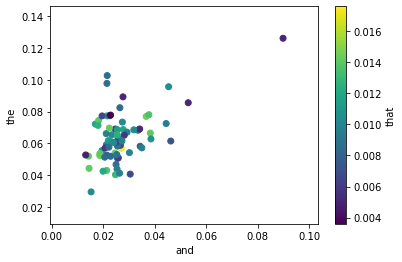

In [21]:
i = 2
x,y=data_list[i]['and'],data_list[i]['the']
f=data_list[i]['that']

#plt.plot(x,y,'o',color='black')
plt.scatter(x,y,c=f)
plt.xlabel('and')
plt.ylabel('the')
plt.colorbar(label='that')

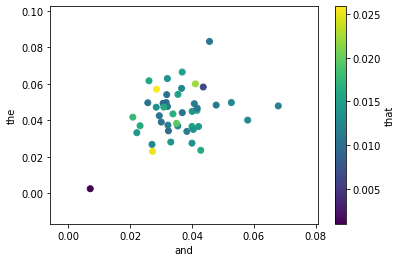

In [22]:
i = 6
x,y=data_list[i]['and'],data_list[i]['the']
f=data_list[i]['that']

#plt.plot(x,y,'o',color='black')
plt.scatter(x,y,c=f)
plt.xlabel('and')
plt.ylabel('the')
plt.colorbar(label='that')

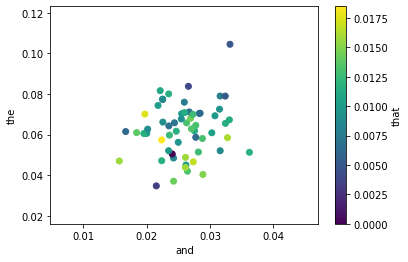

In [23]:
i = 10
x,y=data_list[i]['and'],data_list[i]['the']
f=data_list[i]['that']

#plt.plot(x,y,'o',color='black')
plt.scatter(x,y,c=f)
plt.xlabel('and')
plt.ylabel('the')
plt.colorbar(label='that')

In [24]:
data_list[2]['label'] = 2
data_list[6]['label'] = 1
data_list[10]['label'] = 0

In [25]:
data_list[6]

,and,the,that,of,was,upon,not,then,when,label
0,0.052709,0.049780,0.012445,0.016105,0.012445,0.000732,0.005124,0.009517,0.000000,1
1,0.039985,0.036684,0.015407,0.028613,0.015040,0.001834,0.006236,0.001834,0.002568,1
2,0.027082,0.026856,0.012638,0.014331,0.009704,0.001580,0.004626,0.002483,0.002144,1
3,0.036636,0.057570,0.012710,0.028785,0.011589,0.000748,0.002991,0.002617,0.001869,1
4,0.067870,0.047945,0.011831,0.014944,0.018057,0.001868,0.001868,0.003113,0.006849,1
5,0.033843,0.043579,0.016690,0.020399,0.019008,0.000464,0.003245,0.001391,0.005563,1
6,0.043641,0.058302,0.006478,0.029662,0.007842,0.001705,0.004432,0.002046,0.002387,1
7,0.038340,0.033972,0.011405,0.022810,0.006794,0.000243,0.007037,0.002669,0.001941,1
8,0.031674,0.049774,0.009955,0.016290,0.004525,0.002715,0.008145,0.003620,0.002715,1
9,0.030070,0.039091,0.010358,0.011360,0.009355,0.002005,0.004678,0.002339,0.000668,1


In [26]:
#同じ図でPlot

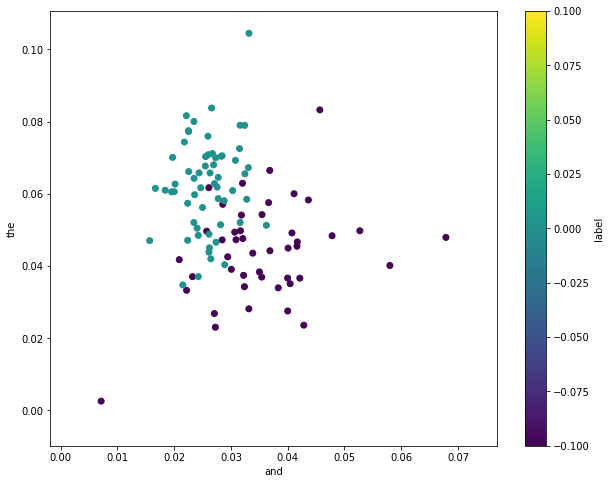

In [27]:
plt.figure(figsize = (10,8))
i = 6
x,y=data_list[i]['and'],data_list[i]['the']
f=data_list[i]['label']

#plt.plot(x,y,'o',color='black')
plt.scatter(x,y,c=f)
plt.xlabel('and')
plt.ylabel('the')
#plt.colorbar(label='that')

j = 10
x,y=data_list[j]['and'],data_list[j]['the']
f=data_list[j]['label']

#plt.plot(x,y,'o',color='black')
plt.scatter(x,y,c=f)
plt.xlabel('and')
plt.ylabel('the')
plt.colorbar(label='label')

In [28]:
data_list[6].columns, len(data_list[6].columns)

(Index(['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'then', 'when',
        'label'],
       dtype='object'),
 10)

In [29]:
#totalを除いた特徴量番号
columns_num = np.arange(0,len(data_list[6].columns)-1,1)
columns_num_list = columns_num.tolist()
columns_num_list 

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [30]:
#totalを除いた特徴量番号から重複なしで選ぶ

l = columns_num_list

c = itertools.combinations(l, 2)

print(type(c))


#for v in itertools.combinations(l, 2):
    #print(v)

c_list = list(itertools.combinations(l, 2))


print(len(c_list))


<class 'itertools.combinations'>
36


In [31]:
c_list

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 6),
 (5, 7),
 (5, 8),
 (6, 7),
 (6, 8),
 (7, 8)]

In [32]:
for index, combi in enumerate(c_list):
    print(index, combi, combi[0],combi[1])

0 (0, 1) 0 1
1 (0, 2) 0 2
2 (0, 3) 0 3
3 (0, 4) 0 4
4 (0, 5) 0 5
5 (0, 6) 0 6
6 (0, 7) 0 7
7 (0, 8) 0 8
8 (1, 2) 1 2
9 (1, 3) 1 3
10 (1, 4) 1 4
11 (1, 5) 1 5
12 (1, 6) 1 6
13 (1, 7) 1 7
14 (1, 8) 1 8
15 (2, 3) 2 3
16 (2, 4) 2 4
17 (2, 5) 2 5
18 (2, 6) 2 6
19 (2, 7) 2 7
20 (2, 8) 2 8
21 (3, 4) 3 4
22 (3, 5) 3 5
23 (3, 6) 3 6
24 (3, 7) 3 7
25 (3, 8) 3 8
26 (4, 5) 4 5
27 (4, 6) 4 6
28 (4, 7) 4 7
29 (4, 8) 4 8
30 (5, 6) 5 6
31 (5, 7) 5 7
32 (5, 8) 5 8
33 (6, 7) 6 7
34 (6, 8) 6 8
35 (7, 8) 7 8


In [33]:
data_list[i].columns[0], data_list[i].columns[1]

('and', 'the')

In [34]:
data_list[6].columns[combi[0]], data_list[6].columns[combi[1]]

('then', 'when')

In [35]:
data_list[6].columns

Index(['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'then', 'when',
       'label'],
      dtype='object')

# totalを除いた特徴量番号から重複なしで選んでPLOT

0 (0, 1) 0 1 and the
1 (0, 2) 0 2 and that
2 (0, 3) 0 3 and of
3 (0, 4) 0 4 and was
4 (0, 5) 0 5 and upon
5 (0, 6) 0 6 and not
6 (0, 7) 0 7 and then
7 (0, 8) 0 8 and when
8 (1, 2) 1 2 the that
9 (1, 3) 1 3 the of
10 (1, 4) 1 4 the was
11 (1, 5) 1 5 the upon
12 (1, 6) 1 6 the not
13 (1, 7) 1 7 the then
14 (1, 8) 1 8 the when
15 (2, 3) 2 3 that of
16 (2, 4) 2 4 that was
17 (2, 5) 2 5 that upon
18 (2, 6) 2 6 that not
19 (2, 7) 2 7 that then
20 (2, 8) 2 8 that when
21 (3, 4) 3 4 of was
22 (3, 5) 3 5 of upon


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


23 (3, 6) 3 6 of not
24 (3, 7) 3 7 of then
25 (3, 8) 3 8 of when
26 (4, 5) 4 5 was upon
27 (4, 6) 4 6 was not
28 (4, 7) 4 7 was then
29 (4, 8) 4 8 was when
30 (5, 6) 5 6 upon not
31 (5, 7) 5 7 upon then
32 (5, 8) 5 8 upon when
33 (6, 7) 6 7 not then
34 (6, 8) 6 8 not when
35 (7, 8) 7 8 then when


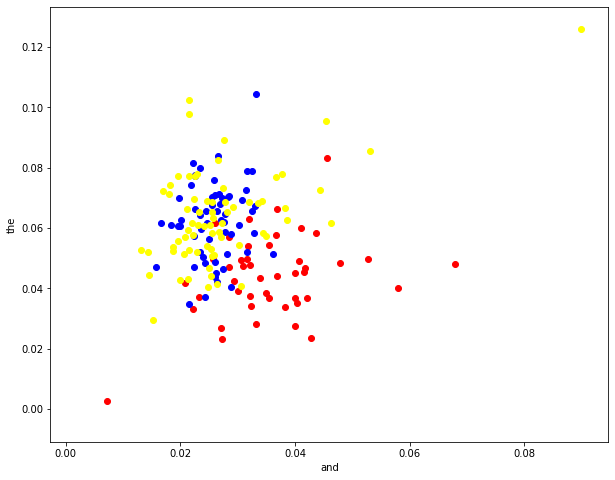

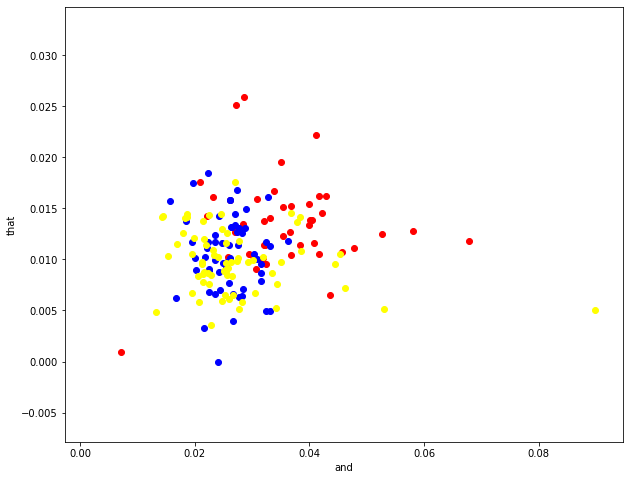

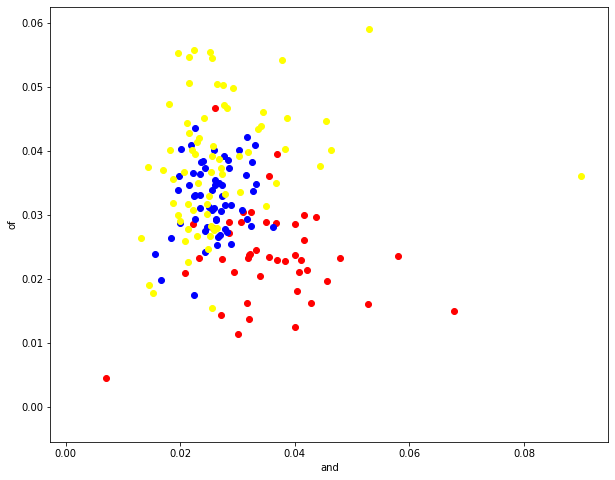

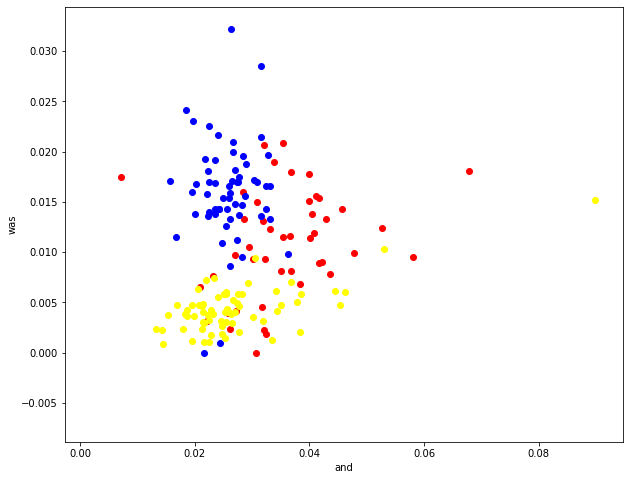

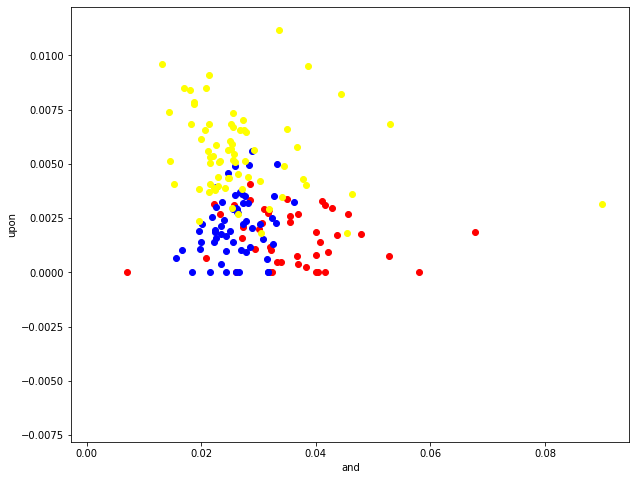

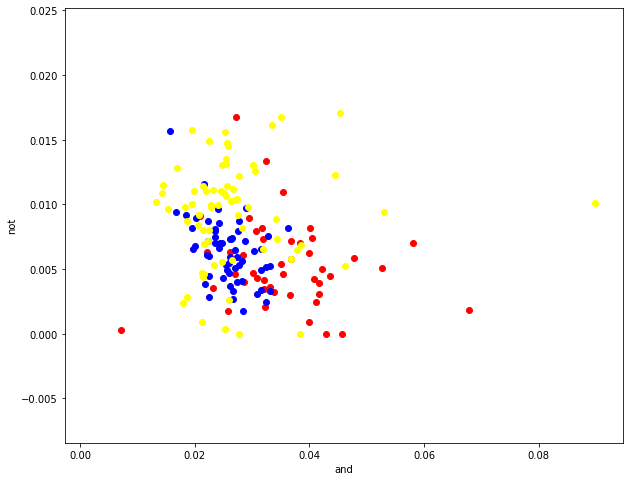

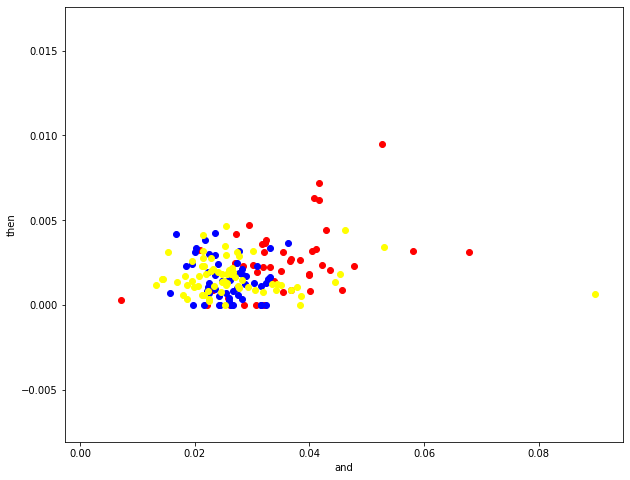

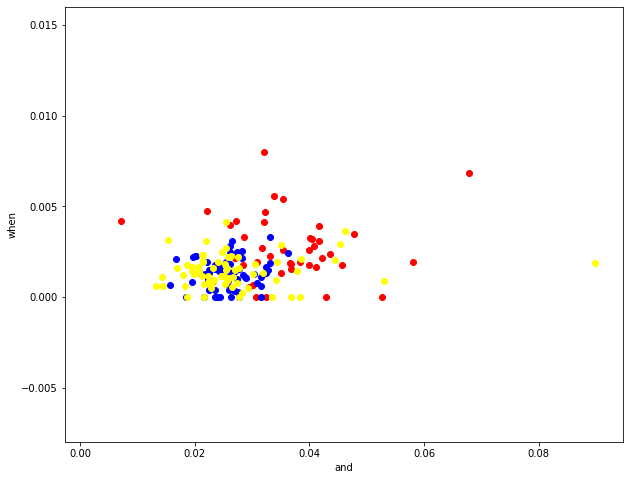

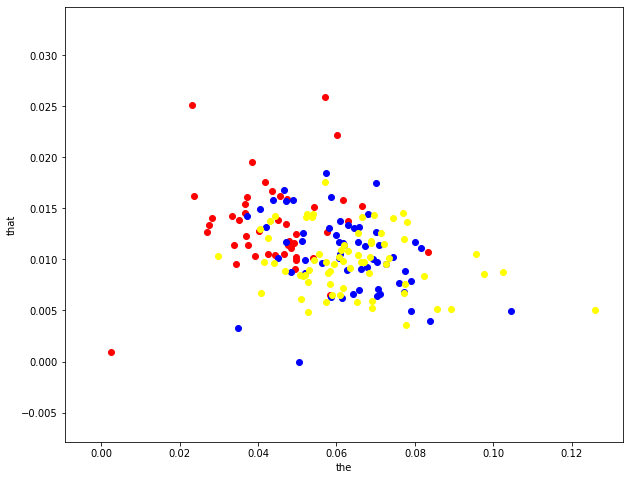

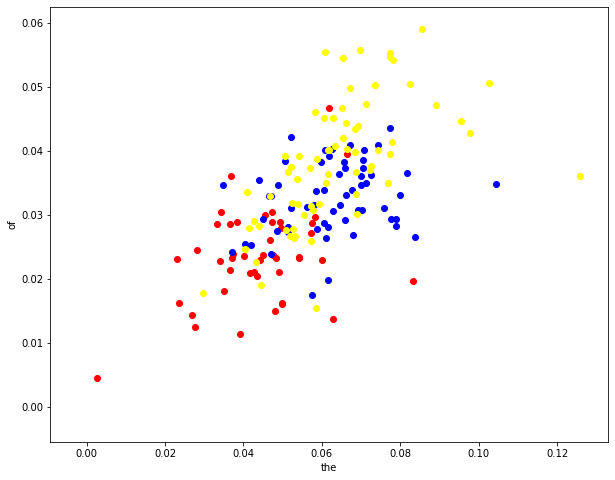

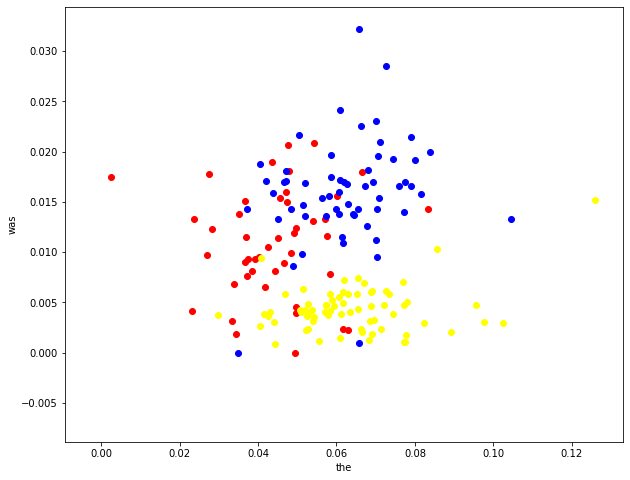

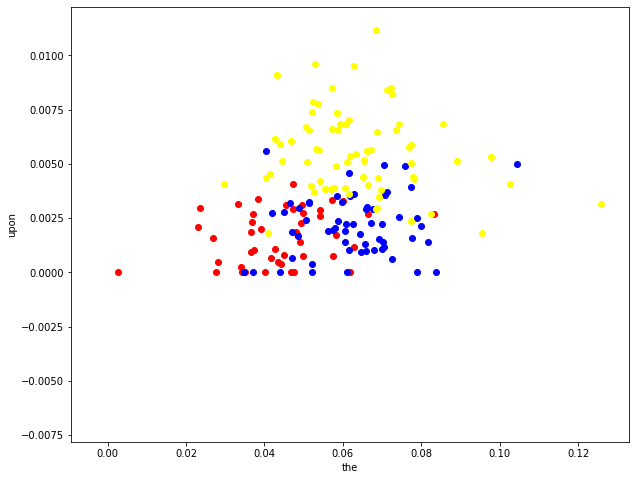

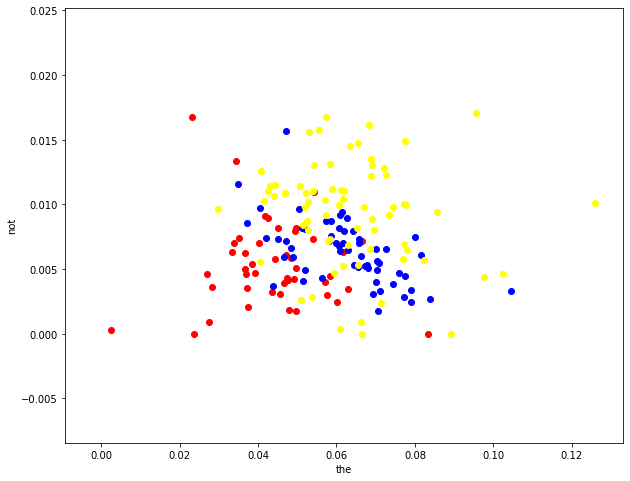

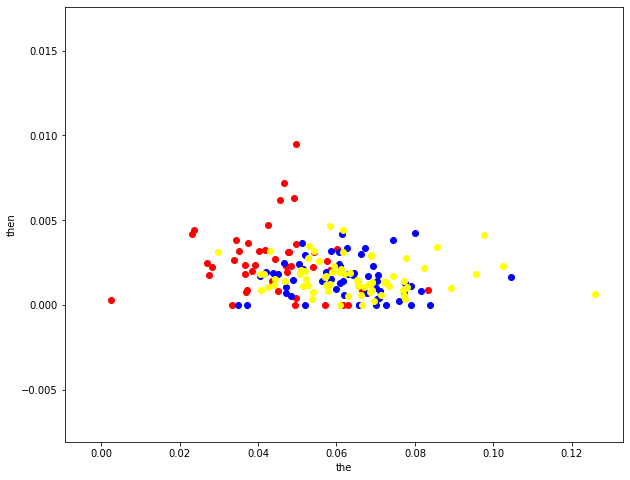

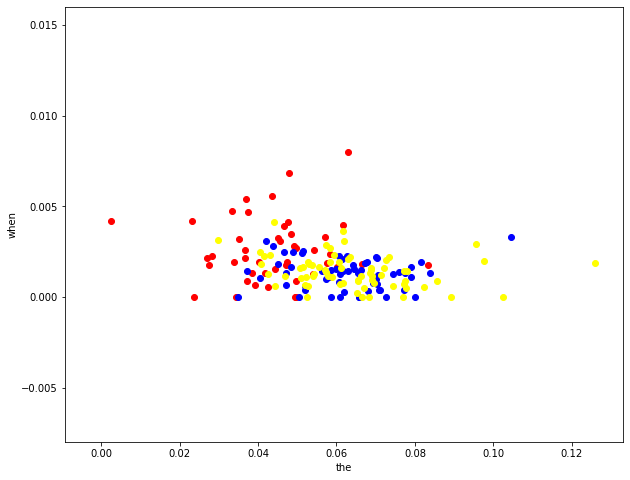

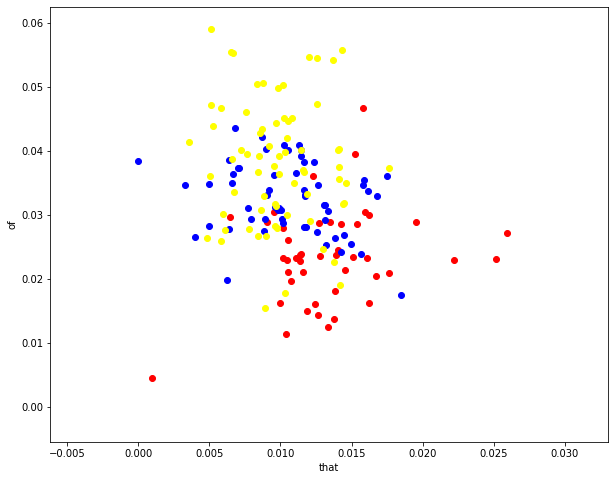

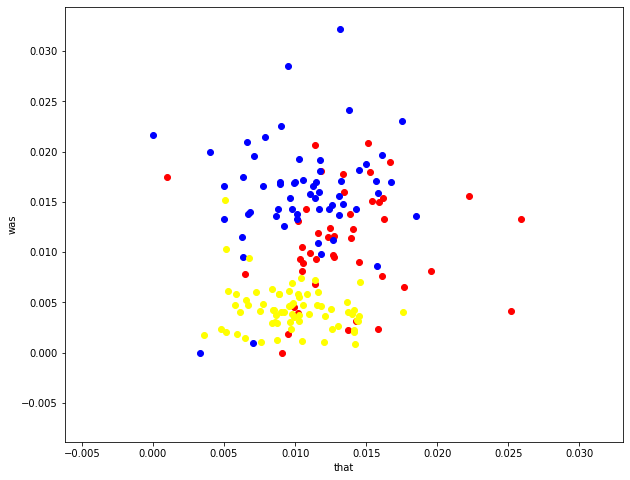

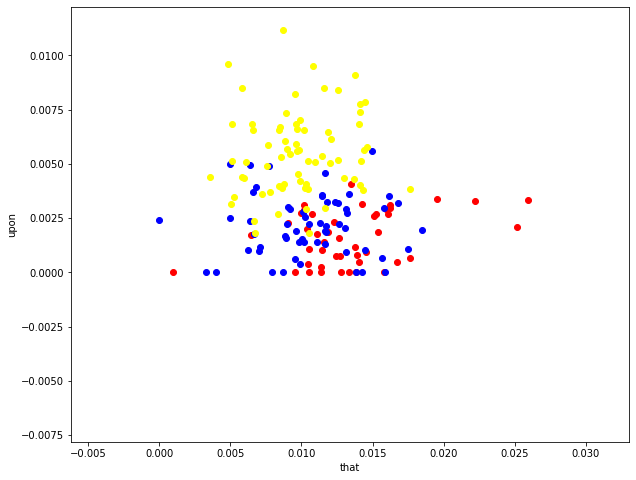

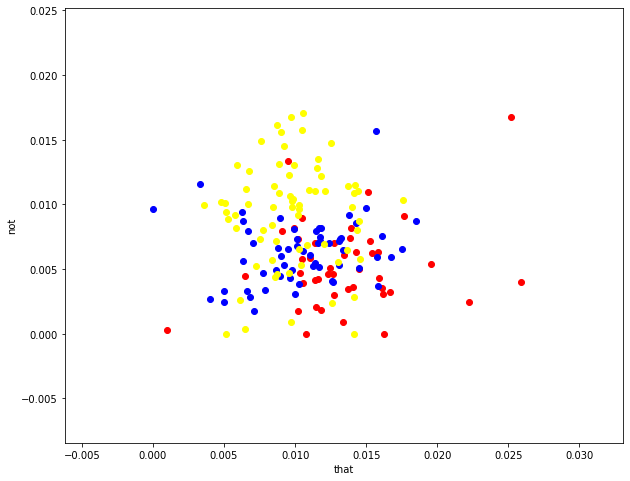

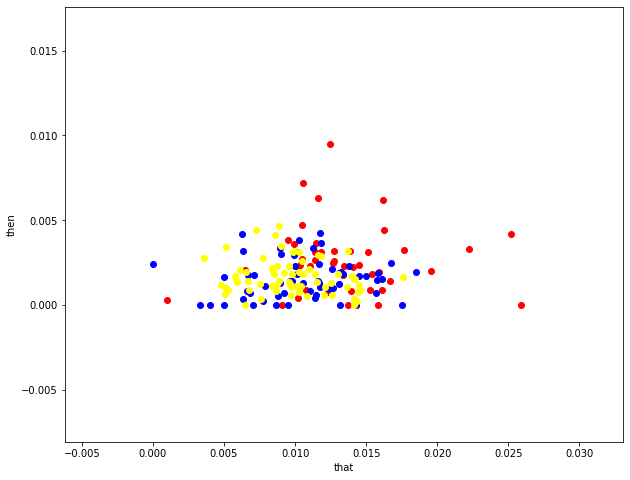

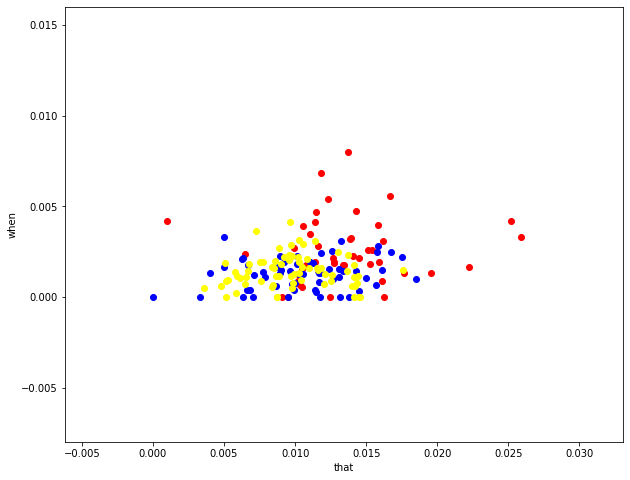

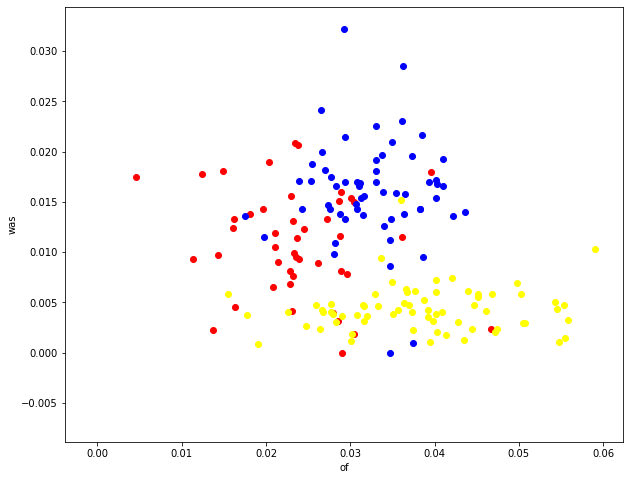

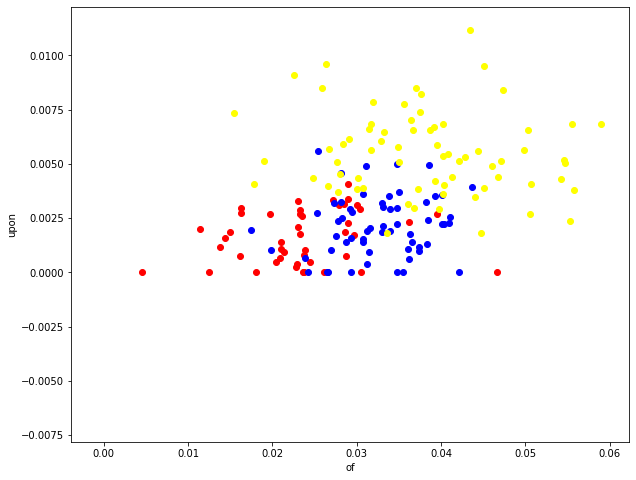

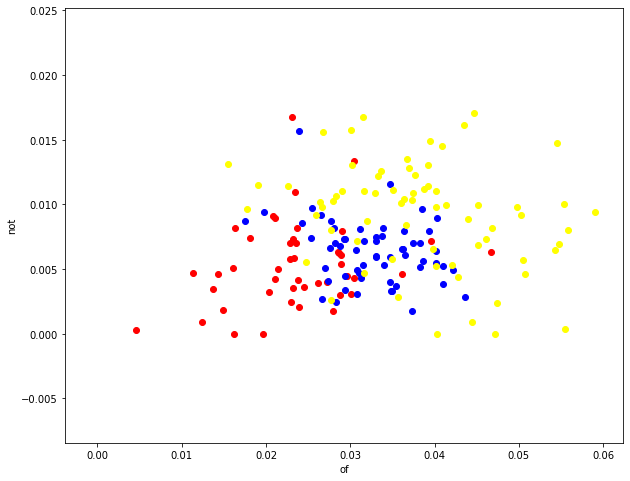

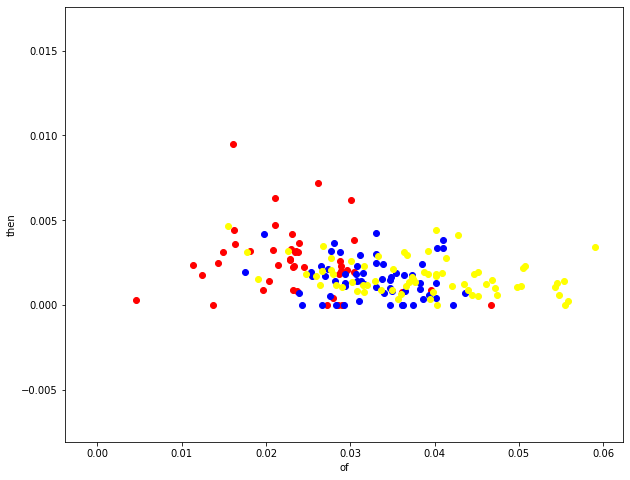

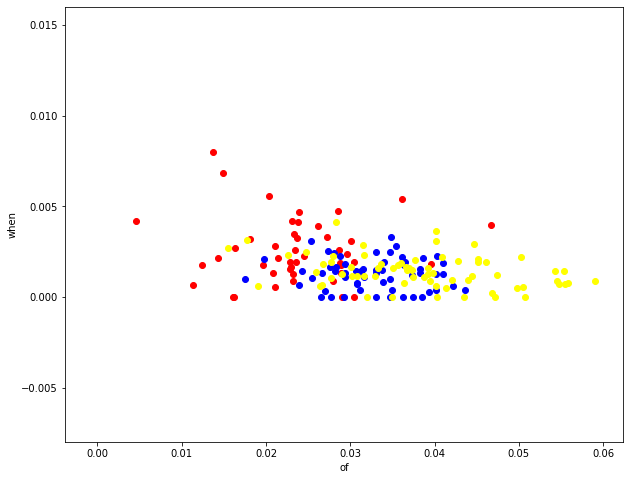

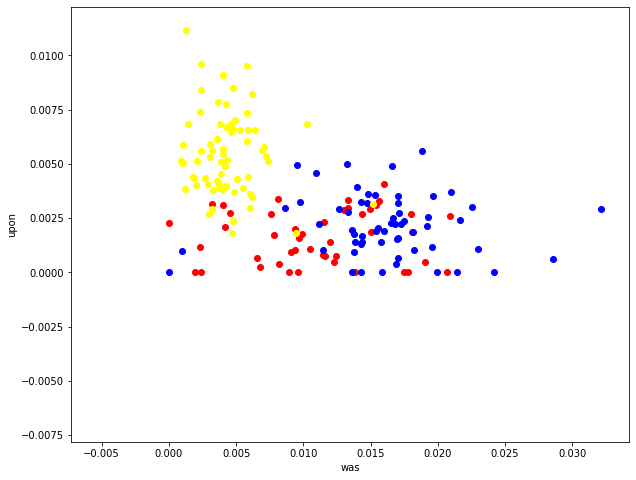

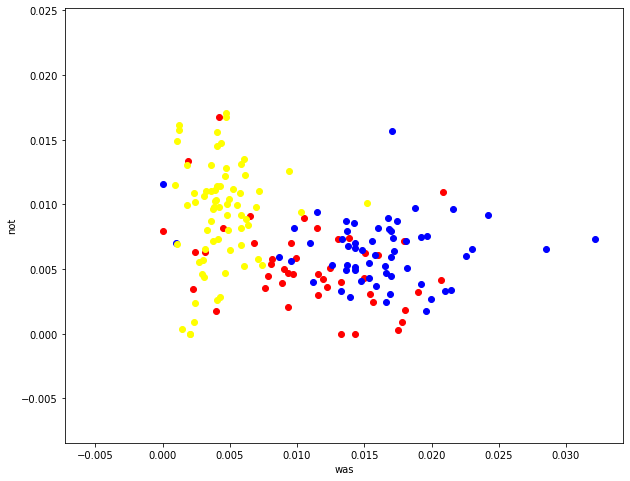

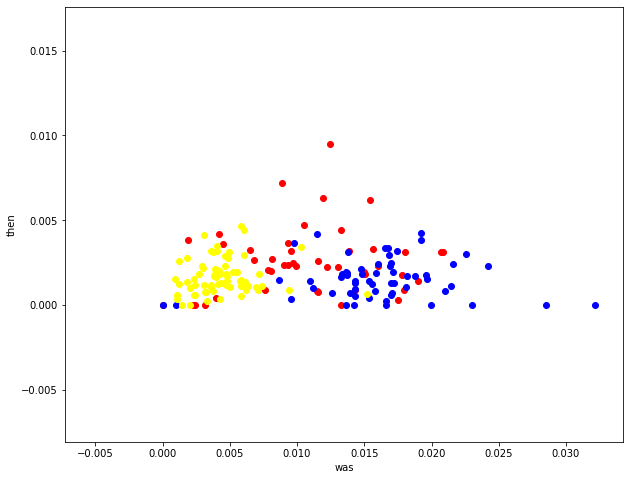

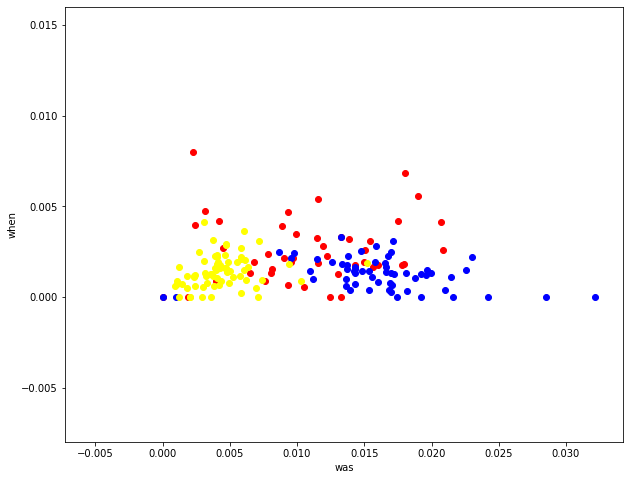

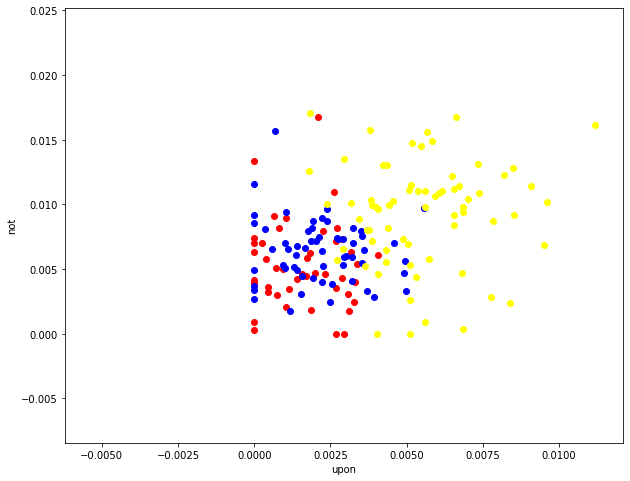

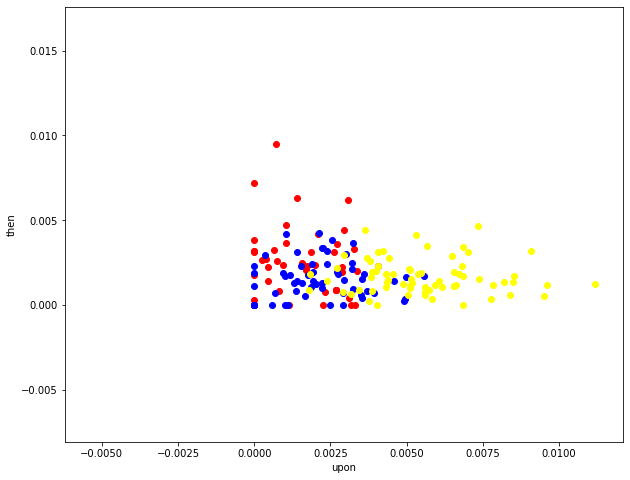

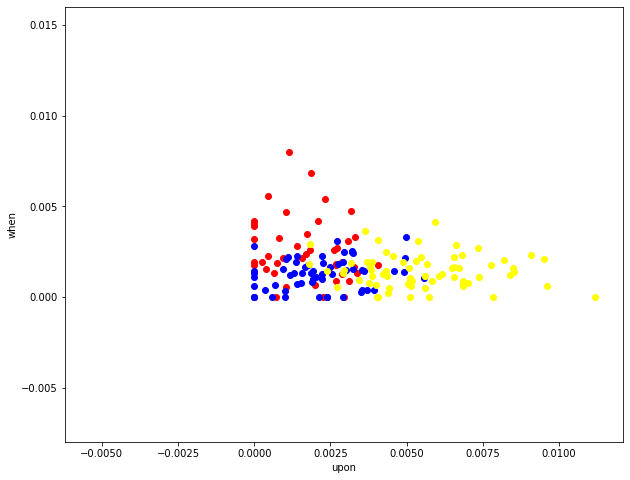

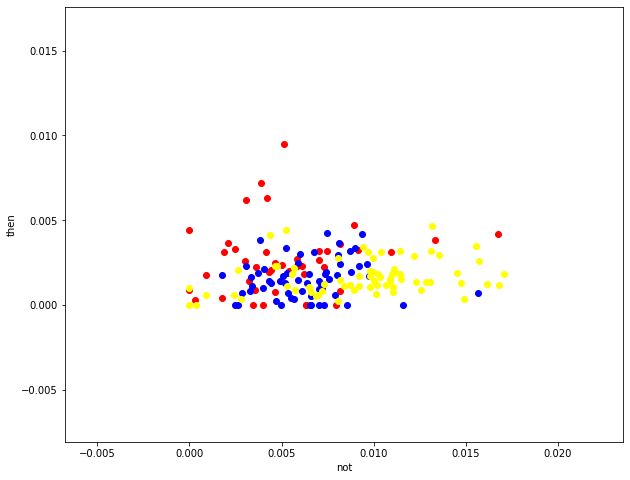

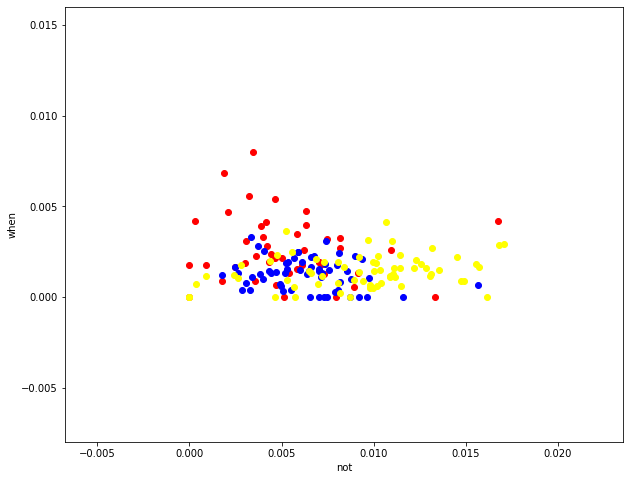

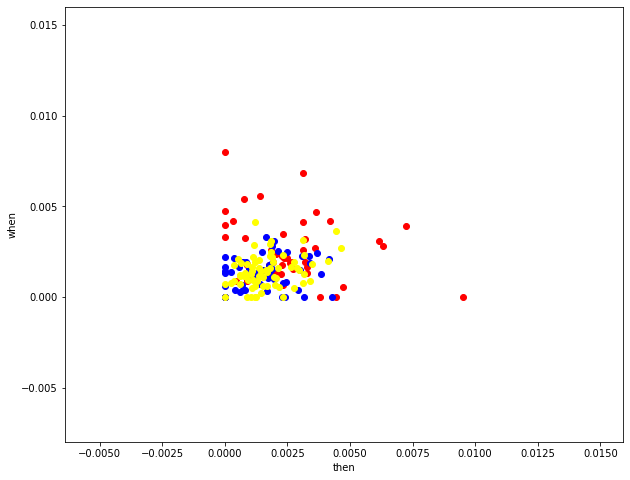

In [36]:
my_makedirs(new_dir_path_png_Combi_n_2)

for index, combi in enumerate(c_list):
    print(index, combi, combi[0],combi[1] ,data_list[6].columns[combi[0]], data_list[6].columns[combi[1]])
    plt.figure(figsize = (10,8))
    
    i = 6
    x,y=data_list[i][data_list[i].columns[combi[0]]],data_list[i][data_list[i].columns[combi[1]]]
    f=data_list[i]['label']

    #plt.plot(x,y,'o',color='black')
    plt.scatter(x,y,c='red')
    plt.xlabel(data_list[i].columns[combi[0]])
    plt.ylabel(data_list[i].columns[combi[1]])
    
    j = 10
    x,y=data_list[j][data_list[j].columns[combi[0]]],data_list[j][data_list[j].columns[combi[1]]]
    f=data_list[j]['label']

    #plt.plot(x,y,'o',color='black')
    plt.scatter(x,y,c='blue')
    #plt.xlabel(data_list[10].columns[combi[0]])
    #plt.ylabel(data_list[10].columns[combi[1]])
    
    k = 2
    x,y=data_list[k][data_list[k].columns[combi[0]]],data_list[k][data_list[k].columns[combi[1]]]
    f=data_list[k]['label']

    #plt.plot(x,y,'o',color='black')
    plt.scatter(x,y,c='yellow')



    #plt.colorbar(label='label')

    title_ =  ("No." + str(i)+ str('_')+str(j) +str('_') + str(k)
               + str(data_list[2].columns[combi[0]])+ str('_')+str(data_list[2].columns[combi[1]]) )
   
    
    filename = new_dir_path_png_Combi_n_2 + "/" + title_ +".png"
    plt.savefig(filename)
  

# MT_methodで異常検知、データ分類

# 学習データを読み込む

# x1と同じように、ほかも正常データの作成

# group1 Poe (x1,y1) # group 2 Twain (x2,y2)

In [37]:
#正常データの作成
x1 = data_list[2]['and']
y1 = data_list[2]['the']

x2 = data_list[6]['and']
y2 = data_list[6]['the']

x3 = data_list[10]['and']
y3 = data_list[10]['the']

x1 = np.array(x1)
y1 = np.array(y1)

x2 = np.array(x2)
y2 = np.array(y2)

x2 = np.array(x2)
y2 = np.array(y2)

x3 = np.array(x3)
y3 = np.array(y3)

x1 = x1.reshape(1,x1.shape[0])
y1 = y1.reshape(1,y1.shape[0])

x2 = x2.reshape(1,x2.shape[0])
y2 = y2.reshape(1,y2.shape[0])

x3 = x3.reshape(1,x3.shape[0])
y3 = y3.reshape(1,y3.shape[0])

y2, y2.shape

(array([[0.04978038, 0.03668379, 0.02685624, 0.05757009, 0.04794521,
         0.04357904, 0.05830208, 0.03397234, 0.04977376, 0.03909121,
         0.04761905, 0.02363368, 0.05710491, 0.03510638, 0.03707012,
         0.04015296, 0.06648697, 0.0369515 , 0.03838384, 0.05412289,
         0.04256437, 0.05425143, 0.03665794, 0.00259235, 0.0483965 ,
         0.06170886, 0.04917457, 0.04966741, 0.03328051, 0.04423749,
         0.04548959, 0.06003289, 0.02755556, 0.06292906, 0.04497138,
         0.04669261, 0.03428571, 0.04177546, 0.0230608 , 0.04724409,
         0.08325873, 0.03742204, 0.04940375, 0.0472973 , 0.02815622]]),
 (1, 45))

In [38]:
y1, y1.shape

(array([[0.06653226, 0.06832298, 0.08923077, 0.05930636, 0.05699482,
         0.06873366, 0.05244123, 0.05555556, 0.05886214, 0.06711249,
         0.12594937, 0.09556686, 0.05720123, 0.05367232, 0.0769571 ,
         0.06544006, 0.06181202, 0.06347473, 0.07731117, 0.07739993,
         0.05071383, 0.05839134, 0.06284658, 0.07802949, 0.05270069,
         0.06619594, 0.07217509, 0.07444232, 0.07779049, 0.06517652,
         0.07250342, 0.0609009 , 0.1025641 , 0.07729008, 0.06907594,
         0.05826426, 0.04311985, 0.06871689, 0.05401742, 0.06112077,
         0.07342901, 0.06154465, 0.0542652 , 0.04685032, 0.06909091,
         0.02966896, 0.0685654 , 0.04082548, 0.04443773, 0.08243243,
         0.04399383, 0.05770636, 0.04045408, 0.05725101, 0.06061445,
         0.0509684 , 0.0519769 , 0.05209774, 0.05282113, 0.05311355,
         0.05142232, 0.0426299 , 0.04139186, 0.06966801, 0.09767702,
         0.07134293, 0.06162246, 0.06536797, 0.0855432 ]]),
 (1, 69))

In [39]:
#正常データの形を整える
data_2 = []
data_2.append(x1)
data_2.append(y1)

data_2 = np.array(data_2)

data_6 = []
data_6.append(x2)
data_6.append(y2)

data_6 = np.array(data_6)

data_10 = []
data_10.append(x3)
data_10.append(y3)

data_10 = np.array(data_10)

data_2, data_2.shape

(array([[[0.03830645, 0.03354037, 0.02769231, 0.02127168, 0.02709104,
          0.0277674 , 0.01868596, 0.01955174, 0.02669584, 0.02925722,
          0.08987342, 0.04542151, 0.02076949, 0.01871469, 0.03670942,
          0.0233308 , 0.02201524, 0.025733  , 0.02151655, 0.0224938 ,
          0.02557   , 0.02552204, 0.03855294, 0.0377562 , 0.02142644,
          0.0211827 , 0.01696791, 0.01822817, 0.02287956, 0.02820138,
          0.04445964, 0.02522523, 0.02156177, 0.01956107, 0.02470265,
          0.03437348, 0.02134855, 0.02545615, 0.02458858, 0.02313762,
          0.02744879, 0.04625905, 0.03019426, 0.02500439, 0.03418182,
          0.01530294, 0.03190928, 0.03050695, 0.01451028, 0.02648649,
          0.0253765 , 0.02222686, 0.0247678 , 0.03501301, 0.02407971,
          0.02589195, 0.02287872, 0.0142923 , 0.01320528, 0.02527473,
          0.0206054 , 0.01993637, 0.02638162, 0.02238431, 0.02145723,
          0.01798561, 0.02730109, 0.02554113, 0.05303678]],
 
        [[0.06653226, 0.0683

In [40]:
#data_2 = data_2.reshape(2,69)

data_2 = data_2.reshape(data_2.shape[0], data_2.shape[2])

data_2 = data_2.transpose()
data_2

array([[0.03830645, 0.06653226],
       [0.03354037, 0.06832298],
       [0.02769231, 0.08923077],
       [0.02127168, 0.05930636],
       [0.02709104, 0.05699482],
       [0.0277674 , 0.06873366],
       [0.01868596, 0.05244123],
       [0.01955174, 0.05555556],
       [0.02669584, 0.05886214],
       [0.02925722, 0.06711249],
       [0.08987342, 0.12594937],
       [0.04542151, 0.09556686],
       [0.02076949, 0.05720123],
       [0.01871469, 0.05367232],
       [0.03670942, 0.0769571 ],
       [0.0233308 , 0.06544006],
       [0.02201524, 0.06181202],
       [0.025733  , 0.06347473],
       [0.02151655, 0.07731117],
       [0.0224938 , 0.07739993],
       [0.02557   , 0.05071383],
       [0.02552204, 0.05839134],
       [0.03855294, 0.06284658],
       [0.0377562 , 0.07802949],
       [0.02142644, 0.05270069],
       [0.0211827 , 0.06619594],
       [0.01696791, 0.07217509],
       [0.01822817, 0.07444232],
       [0.02287956, 0.07779049],
       [0.02820138, 0.06517652],
       [0.

In [41]:
#data_6 = data_6.reshape(2,69)

data_6 = data_6.reshape(data_6.shape[0], data_6.shape[2])

data_6 = data_6.transpose()
data_6

array([[0.05270864, 0.04978038],
       [0.03998533, 0.03668379],
       [0.02708192, 0.02685624],
       [0.03663551, 0.05757009],
       [0.06787049, 0.04794521],
       [0.0338433 , 0.04357904],
       [0.04364132, 0.05830208],
       [0.03834021, 0.03397234],
       [0.03167421, 0.04977376],
       [0.03007016, 0.03909121],
       [0.0320911 , 0.04761905],
       [0.04283604, 0.02363368],
       [0.02855246, 0.05710491],
       [0.04042553, 0.03510638],
       [0.02322465, 0.03707012],
       [0.05799873, 0.04015296],
       [0.03683738, 0.06648697],
       [0.03541186, 0.0369515 ],
       [0.03501684, 0.03838384],
       [0.03183699, 0.05412289],
       [0.02942722, 0.04256437],
       [0.03547209, 0.05425143],
       [0.04213283, 0.03665794],
       [0.00712897, 0.00259235],
       [0.04781341, 0.0483965 ],
       [0.02610759, 0.06170886],
       [0.04074464, 0.04917457],
       [0.02572062, 0.04966741],
       [0.022187  , 0.03328051],
       [0.03686457, 0.04423749],
       [0.

In [42]:
data_10.shape

(2, 1, 59)

In [43]:
data_10 = data_10.reshape(data_10.shape[0], data_10.shape[2])

data_10 = data_10.transpose()
data_10

array([[0.02881171, 0.05809064],
       [0.03029337, 0.06090561],
       [0.02631579, 0.06578947],
       [0.02613412, 0.04881657],
       [0.01567825, 0.04703476],
       [0.02736686, 0.04659763],
       [0.02756598, 0.06187683],
       [0.02888966, 0.04037591],
       [0.02817503, 0.05144077],
       [0.0269451 , 0.06803638],
       [0.01668405, 0.06152242],
       [0.02350333, 0.06430155],
       [0.03277862, 0.05849723],
       [0.02000564, 0.06058045],
       [0.02237613, 0.04714971],
       [0.02424242, 0.04848485],
       [0.02214226, 0.0816496 ],
       [0.0331675 , 0.10447761],
       [0.02708559, 0.06283857],
       [0.02644885, 0.042007  ],
       [0.01954928, 0.06054847],
       [0.03623779, 0.05130293],
       [0.0316181 , 0.05207688],
       [0.0262069 , 0.04505747],
       [0.02179487, 0.07435897],
       [0.02425107, 0.03708987],
       [0.01971522, 0.07009858],
       [0.02255639, 0.06616541],
       [0.0261194 , 0.04384328],
       [0.02775575, 0.05868358],
       [0.

In [44]:
len(data_2)

69

In [45]:
data_2_mean_x = sum(data_2[:,0])/len(data_2)
data_2_mean_x

0.02705189367930958

In [46]:
data_2_mean_y = sum(data_2[:,1])/len(data_2)
data_2_mean_y

0.06380704590547144

In [47]:
data_6_mean_x = sum(data_6[:,0])/len(data_6)
data_6_mean_x

0.035506299706280095

In [48]:
data_6_mean_y = sum(data_6[:,1])/len(data_6)
data_6_mean_y

0.04405095689223954

In [49]:
data_10_mean_x = sum(data_10[:,0])/len(data_10)
data_10_mean_x

0.025872950107530178

In [50]:
data_10_mean_y = sum(data_10[:,1])/len(data_10)
data_10_mean_y

0.062445450534548315

# testデータを読み込む

In [51]:
path_test = str(path_0) + str('/') + str('test_')
path_test

'C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/test_'

In [52]:
path_test = Path(path_test)
path_test
path_test.glob('*.csv')
list(path_test.glob('*.csv'))
print('lists:', path_test.glob('*.csv'))
#list path_test
path_test = list(path_test.glob('*.csv'))
path_test

lists: <generator object Path.glob at 0x0000028A754BEB48>


[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/test_/test_to_csv_output_test_original.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/test_/test_to_csv_output_test_percentage.csv')]

In [53]:
data_test = pd.read_table(path_test[1], delimiter=',')
data_test

,Unnamed: 0,and,the,that,of,was,upon,not,then,total
0,column1,0.019169,0.07508,0.007987,0.051118,0.014377,0.004792,0.011182,0.004792,1.0


In [54]:
data_test = data_test.drop(columns = [ data_test.columns[0], data_test.columns[9] ])
data_test

,and,the,that,of,was,upon,not,then
0,0.019169,0.07508,0.007987,0.051118,0.014377,0.004792,0.011182,0.004792


In [55]:
#正常データの作成
x_test = data_test['and']
y_test = data_test['the']



x_test = np.array(x_test)
y_test = np.array(y_test)


x_test = x_test.reshape(x_test.shape[0])
y_test = y_test.reshape(y_test.shape[0])



y_test, y_test.shape

(array([0.07507987]), (1,))

In [56]:
#正常データの形を整える
data_test = []
data_test.append(x_test)
data_test.append(y_test)

data_test = np.array(data_test)
data_test, data_test.shape

(array([[0.01916933],
        [0.07507987]]),
 (2, 1))

In [57]:
data_test = data_test.reshape(1,2)
data_test

array([[0.01916933, 0.07507987]])

In [58]:
import numpy as np
import matplotlib.pyplot as plt

divide = 2 #状態量の数
R = np.zeros((divide,divide))    #相関行列
invR = np.zeros((divide,divide)) #相関行列の逆行列
avg = np.zeros(divide)           #平均値
std = np.zeros(divide)           #標準偏差
make = 0

p = 0.95        #マハラノビス距離p=0.95で2σ
md_sikii = 2.448#MDの閾値95%で2.448
div = 50        #Mt楕円の分割数

def maha(x):
    global make, R, invR, avg, std

    N, _ = x.shape #Nはデータ数
    xx = np.copy(x)
    xx = np.array(xx,dtype="float32")
    x_return = []

    #各状態量から平均値を引く
    for i in range(divide):
        if make == 0:
            avg[i] = np.mean(x[:,i])
        for j in range(N):
            xx[j,i] = xx[j,i] - avg[i]

    #各状態量を標準偏差で割る
    for i in range(divide):
        if make == 0:
            std[i] = np.std(x[:,i])
        for j in range(N):
            xx[j,i] = xx[j,i] / std[i]

    #make=0のときだけ計算
    if make == 0:
        R = np.corrcoef(xx.transpose())
        invR = np.linalg.inv(R)
        make = 1

    #MD^2の計算
    for i in range(N):
        d0 = xx[i,:]
        d1 = np.dot(d0,invR)
        d2 = np.dot(d1,d0)/divide
        x_return.append(d2)

    return x_return



In [59]:
# 単位空間の作成

In [60]:
#各点のMahalanobis' Distance
xreturn = maha(data_2)
xreturn

[0.6451699331949814,
 0.18054786127113306,
 1.7394382793678724,
 0.14253056847495638,
 0.13103236541480873,
 0.05547745756611861,
 0.3627625295486996,
 0.2554977379787887,
 0.061434733915188874,
 0.027661608284781185,
 17.291137980039085,
 2.278953100249765,
 0.176149008550404,
 0.3324064874115162,
 0.48433579805615845,
 0.11719478953531173,
 0.11900682745591284,
 0.008808534101257308,
 1.0227444385536306,
 0.9140743005984899,
 0.40750230893085665,
 0.059653729789085744,
 0.8440973576542625,
 0.58319887969349,
 0.2600277457939022,
 0.28413958588772426,
 1.176680147010933,
 1.196003455974636,
 0.9081249863738894,
 0.006244028018617085,
 1.3622480319664465,
 0.0202832105481124,
 5.319706325438632,
 1.2893084166881463,
 0.16520905958064,
 0.5858152732687112,
 0.8734816162936492,
 0.11718050988219575,
 0.1984609245033187,
 0.06578559031911582,
 0.24320041332149517,
 2.416949160854948,
 0.4458421635728467,
 0.6769519825747327,
 0.21714445728253753,
 2.324146538510741,
 0.10312342986456569,


In [61]:
_ = maha(data_2)
avg_2_x = avg[0]
avg_2_y = avg[1]
print(avg_2_x ,avg_2_y)
std_2_x = std[0]
std_2_y = std[1]
print(std_2_x ,std_2_y)

#テストデータのマハラノビス距離
md_2 = maha(data_test)
md_2

0.02705189367930958 0.06380704590547145
0.010826372294302652 0.01584637604211068


[1.118909493487077]

In [62]:
divide = 2 #状態量の数
R = np.zeros((divide,divide))    #相関行列
invR = np.zeros((divide,divide)) #相関行列の逆行列
avg = np.zeros(divide)           #平均値
std = np.zeros(divide)           #標準偏差
make = 0

#単位空間の作成
_ = maha(data_6)
avg_1_x = avg[0]
avg_1_y = avg[1]
print(avg_1_x ,avg_1_y)
std_1_x = std[0]
std_1_y = std[1]
print(std_1_x ,std_1_y)

#テストデータのマハラノビス距離
md_1 = maha(data_test)
md_1

0.03550629970628009 0.04405095689223954
0.00995689393148243 0.013397018378760265


[5.802726171002479]

In [63]:
divide = 2 #状態量の数
R = np.zeros((divide,divide))    #相関行列
invR = np.zeros((divide,divide)) #相関行列の逆行列
avg = np.zeros(divide)           #平均値
std = np.zeros(divide)           #標準偏差
make = 0

#単位空間の作成
_ = maha(data_10)
avg_0_x = avg[0]
avg_0_y = avg[1]
print(avg_0_x ,avg_0_y)
std_0_x = std[0]
std_0_y = std[1]
print(std_0_x ,std_0_y)

#テストデータのマハラノビス距離
md_0 = maha(data_test)
md_0

0.02587295010753017 0.06244545053454831
0.004266783883842671 0.012860704258934437


[2.0367698015357925]

# 正規分布の等高線（0.95）をかく

In [64]:
#楕円のデータ
low_2 = np.corrcoef(data_2[:,0],data_2[:,1])[0,1]
low_1 = np.corrcoef(data_6[:,0],data_6[:,1])[0,1]
low_0 = np.corrcoef(data_10[:,0],data_10[:,1])[0,1]

In [65]:
data_2[:,0],data_2[:,1]

(array([0.03830645, 0.03354037, 0.02769231, 0.02127168, 0.02709104,
        0.0277674 , 0.01868596, 0.01955174, 0.02669584, 0.02925722,
        0.08987342, 0.04542151, 0.02076949, 0.01871469, 0.03670942,
        0.0233308 , 0.02201524, 0.025733  , 0.02151655, 0.0224938 ,
        0.02557   , 0.02552204, 0.03855294, 0.0377562 , 0.02142644,
        0.0211827 , 0.01696791, 0.01822817, 0.02287956, 0.02820138,
        0.04445964, 0.02522523, 0.02156177, 0.01956107, 0.02470265,
        0.03437348, 0.02134855, 0.02545615, 0.02458858, 0.02313762,
        0.02744879, 0.04625905, 0.03019426, 0.02500439, 0.03418182,
        0.01530294, 0.03190928, 0.03050695, 0.01451028, 0.02648649,
        0.0253765 , 0.02222686, 0.0247678 , 0.03501301, 0.02407971,
        0.02589195, 0.02287872, 0.0142923 , 0.01320528, 0.02527473,
        0.0206054 , 0.01993637, 0.02638162, 0.02238431, 0.02145723,
        0.01798561, 0.02730109, 0.02554113, 0.05303678]),
 array([0.06653226, 0.06832298, 0.08923077, 0.05930636, 0.

In [66]:
low_2, low_1, low_0

(0.537013110439081, 0.315221526798619, 0.1694408341670984)

In [67]:
#楕円半径の計算　Poe 
#p=0.95に対応する楕円

curve_c_2 = np.zeros((2,div+1))
for i in range(div+1):
    r = (-2*(1-low_2**2)*np.log(1-p)/(1-2*low_2*np.sin(i*2*np.pi/div)*np.cos(i*2*np.pi/div)))**0.5
    curve_c_2[0,i] = avg_2_x + std_2_x *r*np.cos(i*2*np.pi/div)
    curve_c_2[1,i] = avg_2_y + std_2_y *r*np.sin(i*2*np.pi/div)
    
    print(r)
curve_c_2

2.0648553321257457
2.218287381580133
2.3982529332482545
2.5965542287875287
2.792935078671586
2.9519925358461125
3.031159919298489
3.0039260926995137
2.8798343849783103
2.6968558033353123
2.496031039833863
2.3052493454116076
2.1380602654429697
1.9986890703934788
1.8867650930353885
1.8001956617938286
1.7365982983816384
1.6939253020695975
1.6707014870404204
1.6660982352319373
1.6799495080801505
1.7127531928299007
1.7656652644340758
1.8404631508357967
1.9394087051662068
2.0648553321257452
2.218287381580133
2.3982529332482545
2.5965542287875287
2.792935078671586
2.951992535846112
3.0311599192984895
3.0039260926995133
2.8798343849783103
2.696855803335312
2.496031039833863
2.3052493454116076
2.1380602654429692
1.9986890703934792
1.8867650930353885
1.8001956617938286
1.7365982983816388
1.6939253020695975
1.6707014870404204
1.6660982352319373
1.6799495080801505
1.7127531928299002
1.765665264434076
1.8404631508357967
1.9394087051662066
2.0648553321257452


array([[0.04940679, 0.05087853, 0.05220055, 0.05318908, 0.05354909,
        0.05290757, 0.05097407, 0.04778196, 0.04375799, 0.03948344,
        0.03540245, 0.03172846, 0.02850533, 0.0256932 , 0.02322429,
        0.02102928, 0.01904679, 0.01722533, 0.0155224 , 0.0139029 ,
        0.01233769, 0.01080262, 0.00927852, 0.00775235, 0.0062207 ,
        0.004697  , 0.00322526, 0.00190323, 0.0009147 , 0.0005547 ,
        0.00119622, 0.00312972, 0.00632183, 0.0103458 , 0.01462035,
        0.01870134, 0.02237533, 0.02559845, 0.02841059, 0.0308795 ,
        0.03307451, 0.035057  , 0.03687846, 0.03858139, 0.04020088,
        0.0417661 , 0.04330116, 0.04482527, 0.04635144, 0.04788309,
        0.04940679],
       [0.06380705, 0.06821274, 0.07325816, 0.07895389, 0.08512845,
        0.09130269, 0.09668783, 0.10048451, 0.1023379 , 0.10247518,
        0.10142423, 0.09968985, 0.0976207 , 0.09541653, 0.09317585,
        0.09093743, 0.08870679, 0.08647098, 0.08420605, 0.0818802 ,
        0.07945454, 0.07688

In [68]:
#楕円半径の計算　Twain

curve_c_1 = np.zeros((2,div+1))
for i in range(div+1):
    r = (-2*(1-low_1**2)*np.log(1-p)/(1-2*low_1*np.sin(i*2*np.pi/div)*np.cos(i*2*np.pi/div)))**0.5
    curve_c_1[0,i] = avg_1_x + std_1_x*r*np.cos(i*2*np.pi/div)
    curve_c_1[1,i] = avg_1_y + std_1_y*r*np.sin(i*2*np.pi/div)
    print(r)
curve_c_1

2.3229560915610143
2.4197359593068204
2.5223596175357423
2.623150129169597
2.711673840695767
2.7760541155735106
2.8058780735142714
2.79577739478055
2.7476100606969953
2.669680680358519
2.5735789494191224
2.470727714055838
2.3702495051417096
2.27838513560046
2.1988771597755328
2.133683765584478
2.083655844894502
2.0490478495746753
2.029856573761162
2.026022518006431
2.037529111940034
2.0644214518184705
2.106748977929738
2.164418895027311
2.2369310117719134
2.3229560915610143
2.4197359593068204
2.522359617535742
2.623150129169597
2.711673840695767
2.77605411557351
2.8058780735142714
2.7957773947805498
2.7476100606969953
2.669680680358518
2.5735789494191224
2.470727714055838
2.370249505141709
2.2783851356004603
2.198877159775533
2.133683765584478
2.0836558448945026
2.0490478495746753
2.0298565737611622
2.026022518006431
2.0375291119400334
2.0644214518184705
2.106748977929738
2.164418895027311
2.2369310117719134
2.3229560915610143


array([[0.05863573, 0.05940937, 0.05983214, 0.0597906 , 0.05916645,
        0.05786824, 0.0558721 , 0.05325044, 0.05016527, 0.04682425,
        0.04342481, 0.04011603, 0.03698818, 0.03408186, 0.03140378,
        0.02894128, 0.02667277, 0.02457428, 0.02262328, 0.02080089,
        0.0190934 , 0.01749362, 0.01600268, 0.01463247, 0.01340904,
        0.01237687, 0.01160323, 0.01118046, 0.011222  , 0.01184615,
        0.01314436, 0.0151405 , 0.01776216, 0.02084733, 0.02418835,
        0.02758778, 0.03089657, 0.03402442, 0.03693074, 0.03960882,
        0.04207132, 0.04433983, 0.04643832, 0.04838932, 0.0502117 ,
        0.0519192 , 0.05351898, 0.05500992, 0.05638013, 0.05760356,
        0.05863573],
       [0.04405096, 0.04811392, 0.05245471, 0.05698773, 0.06155227,
        0.06591119, 0.06978336, 0.07291059, 0.07513048, 0.07641279,
        0.07684175, 0.07656504, 0.07574257, 0.07451429, 0.07298757,
        0.07123691, 0.069309  , 0.06722871, 0.06500431, 0.06263139,
        0.06009562, 0.05737

In [69]:
#楕円半径の計算　Twain

curve_c_0 = np.zeros((2,div+1))
for i in range(div+1):
    r = (-2*(1-low_0**2)*np.log(1-p)/(1-2*low_0*np.sin(i*2*np.pi/div)*np.cos(i*2*np.pi/div)))**0.5
    curve_c_0[0,i] = avg_0_x + std_0_x*r*np.cos(i*2*np.pi/div)
    curve_c_0[1,i] = avg_0_y + std_0_y*r*np.sin(i*2*np.pi/div)
    print(r)
curve_c_0

2.412353295837163
2.464844294477211
2.517281422222545
2.5657384349313492
2.6059532689986056
2.6338933771797284
2.646477622458864
2.64224063353565
2.621681257129305
2.5871416396230957
2.5422714492622935
2.4913021295257542
2.43838368654012
2.3871391372381905
2.3404637711500658
2.300512346662179
2.268792584744453
2.246296121802564
2.233622570615813
2.231073499169722
2.238706489351097
2.256346059319794
2.2835509975491166
2.3195396551414458
2.363079047434603
2.412353295837163
2.464844294477211
2.5172814222225446
2.5657384349313492
2.6059532689986056
2.6338933771797284
2.646477622458864
2.64224063353565
2.621681257129305
2.5871416396230957
2.5422714492622935
2.4913021295257542
2.43838368654012
2.3871391372381905
2.3404637711500658
2.300512346662179
2.268792584744453
2.246296121802564
2.233622570615813
2.231073499169722
2.238706489351097
2.256346059319794
2.283550997549117
2.3195396551414458
2.363079047434603
2.412353295837163


array([[0.03616594, 0.03630698, 0.03627621, 0.03605163, 0.03561664,
        0.03496489, 0.03410443, 0.03305919, 0.03186679, 0.03057303,
        0.02922496, 0.02786478, 0.02652623, 0.0252334 , 0.02400171,
        0.0228397 , 0.02175122, 0.02073734, 0.01979805, 0.01893353,
        0.01814516, 0.01743645, 0.01681375, 0.01628691, 0.01586971,
        0.01557996, 0.01543892, 0.01546969, 0.01569427, 0.01612926,
        0.01678101, 0.01764147, 0.01868672, 0.01987911, 0.02117287,
        0.02252094, 0.02388112, 0.02521967, 0.0265125 , 0.02774419,
        0.0289062 , 0.02999468, 0.03100856, 0.03194785, 0.03281237,
        0.03360074, 0.03430945, 0.03493215, 0.03545899, 0.03587619,
        0.03616594],
       [0.06244545, 0.06641847, 0.07049654, 0.07459253, 0.07859113,
        0.08235593, 0.0857444 , 0.08862832, 0.09091337, 0.09255128,
        0.09354062, 0.09391784, 0.0937429 , 0.09308516, 0.09201231,
        0.09058361, 0.08884674, 0.0868372 , 0.08457918, 0.08208728,
        0.07936858, 0.07642

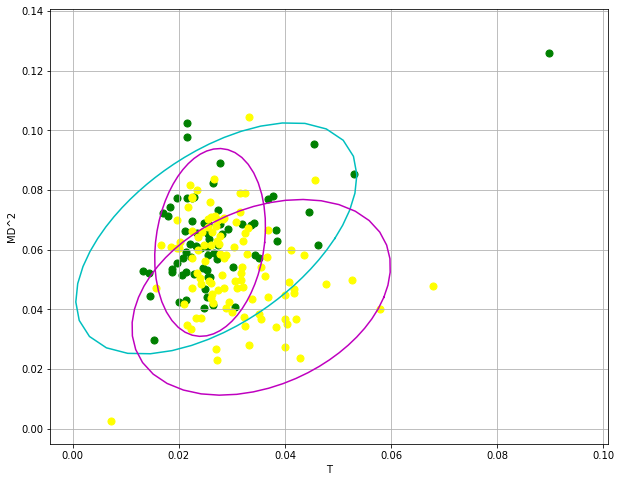

In [70]:
my_makedirs(new_dir_path_png_Combi_n_2)

plt.figure(figsize = (10,8))

#plt.subplot(1,2,1)
plt.scatter(x1, y1, c="green", s=50)
plt.plot(curve_c_2[0],curve_c_2[1],c="c",label="MD^2=2.448")


plt.scatter(x2, y2, c="yellow", s=50)
plt.plot(curve_c_1[0],curve_c_1[1],c="m",label="MD^2=2.448")

plt.scatter(x3, y3, c="yellow", s=50)
plt.plot(curve_c_0[0],curve_c_0[1],c="m",label="MD^2=2.448")


#plt.scatter(data_test[:,0],data_test[:,1],c="r", s=50)
#plt.scatter(test2[:,0],test2[:,1],c="red", s=50)
plt.xlabel("T")
plt.ylabel("KN")
plt.ylabel("MD^2")
plt.grid(True)

#将来的に各特徴量にリスト化
#title_ =  ("No." + str(i)+ str('_')+str(j) +str('_')
               #+ str(data_list[2].columns[combi[0]])+ str('_')+str(data_list[2].columns[combi[1]]) )

title_ =  ("No." + str('2')+ str('_')+str('10') +str('_')
               + str('and')+ str('_')+str('the') )
   
    
filename = new_dir_path_png_Mahalanobis + "/" + title_ +".png"
plt.savefig(filename)


# 可視化

In [71]:
#mean_value of each set

(data_2_mean_x, data_2_mean_y), (data_10_mean_x, data_10_mean_y)

((0.02705189367930958, 0.06380704590547144),
 (0.025872950107530178, 0.062445450534548315))

In [72]:
md_2, md_1, md_0

([1.118909493487077], [5.802726171002479], [2.0367698015357925])

In [73]:
std_2_x, avg_2_x

(0.010826372294302652, 0.02705189367930958)

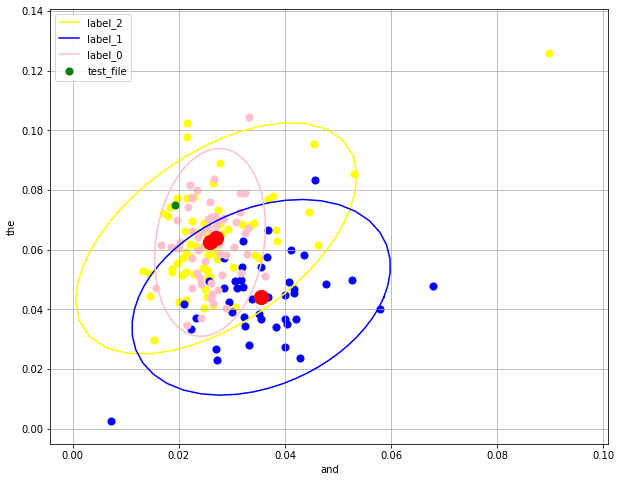

In [74]:
my_makedirs(new_dir_path_png_Combi_n_2)

plt.figure(figsize = (10,8))


#plt.subplot(1,2,1)
plt.scatter(x1, y1, c="yellow", s=50)
plt.plot(curve_c_2[0],curve_c_2[1],c="yellow",label="label_2")


plt.scatter(x2, y2, c="blue", s=50)
plt.plot(curve_c_1[0],curve_c_1[1],c="blue",label="label_1")

plt.scatter(x3, y3, c="pink", s=50)
plt.plot(curve_c_0[0],curve_c_0[1],c="pink",label="label_0")


plt.scatter(data_test[0][0],data_test[0][1],c="green", s=50, label = 'test_file')
#plt.scatter(data_test[:,0],data_test[:,1],c="r", s=50)
#plt.scatter(test2[:,0],test2[:,1],c="red", s=50)


plt.scatter([avg_2_x], [avg_2_y], c="red", s=200)
plt.scatter([avg_1_x], [avg_1_y], c="red", s=200)
plt.scatter([avg_0_x], [avg_0_y], c="red", s=200)



plt.xlabel("and")
plt.ylabel("the")

plt.grid(True)
plt.legend(loc='upper left')

#将来的に各特徴量にリスト化
#title_ =  ("No." + str(i)+ str('_')+str(j) +str('_')
               #+ str(data_list[2].columns[combi[0]])+ str('_')+str(data_list[2].columns[combi[1]]) )

title_ =  ("No." + str('2')+ str('_')+str('10') +str('_')
               + str('and')+ str('_')+str('the') )
   
    
filename = new_dir_path_png_Mahalanobis + "/" + title_ +".png"
plt.savefig(filename)


No handles with labels found to put in legend.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


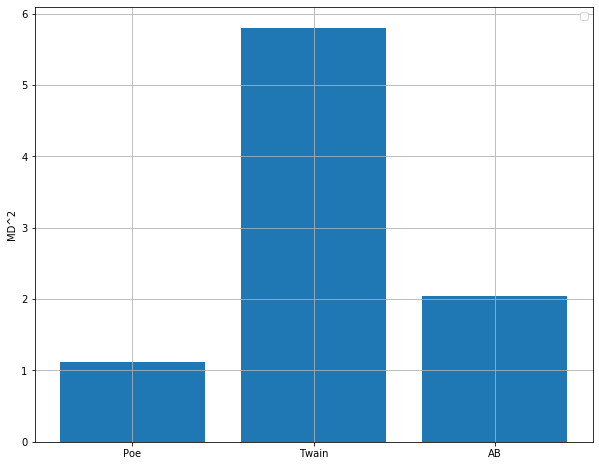

In [75]:
#可視化
plt.figure(figsize = (10,8))
plt.legend()

plt.subplot()
plt.bar([1,2,3], [md_2[0], md_1[0], md_0[0]], align="center")

plt.xticks([1,2, 3], ["Poe", "Twain",'AB'])
plt.ylabel("MD^2")
plt.grid(True)

my_makedirs(new_dir_path_png_Mahalanobis)

filename = new_dir_path_png_Mahalanobis + "/" + title_ +"bar.png"
plt.savefig(filename)
  

# その他の次元についてもMahalanobis距離を計算（自動化コード構築）

# Machine_Learing_Algorithm

# DecisionTreeClassifier

# LDA

# PCA

# 次元圧縮を行ったバージョン

# Poe_letter

# Twin_letter

# Poe_story + Twain_story+test02

In [76]:
data_2 = data_list[2].copy()
data_2 

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,2
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,2
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,2
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,2
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,2
...,...,...,...,...,...,...,...,...,...,...
64,0.021457,0.097677,0.008583,0.042821,0.003079,0.005318,0.004385,0.004105,0.001959,2
65,0.017986,0.071343,0.012590,0.047362,0.002398,0.008393,0.002398,0.000600,0.001199,2
66,0.027301,0.061622,0.009880,0.036401,0.004940,0.007020,0.010400,0.003120,0.000780,2
67,0.025541,0.065368,0.012554,0.054545,0.004329,0.005195,0.014719,0.001299,0.000866,2


In [77]:
data_06 = data_list[6].copy()
#data_10 = data_10.drop('label', axis =1)
data_06

,and,the,that,of,was,upon,not,then,when,label
0,0.052709,0.049780,0.012445,0.016105,0.012445,0.000732,0.005124,0.009517,0.000000,1
1,0.039985,0.036684,0.015407,0.028613,0.015040,0.001834,0.006236,0.001834,0.002568,1
2,0.027082,0.026856,0.012638,0.014331,0.009704,0.001580,0.004626,0.002483,0.002144,1
3,0.036636,0.057570,0.012710,0.028785,0.011589,0.000748,0.002991,0.002617,0.001869,1
4,0.067870,0.047945,0.011831,0.014944,0.018057,0.001868,0.001868,0.003113,0.006849,1
5,0.033843,0.043579,0.016690,0.020399,0.019008,0.000464,0.003245,0.001391,0.005563,1
6,0.043641,0.058302,0.006478,0.029662,0.007842,0.001705,0.004432,0.002046,0.002387,1
7,0.038340,0.033972,0.011405,0.022810,0.006794,0.000243,0.007037,0.002669,0.001941,1
8,0.031674,0.049774,0.009955,0.016290,0.004525,0.002715,0.008145,0.003620,0.002715,1
9,0.030070,0.039091,0.010358,0.011360,0.009355,0.002005,0.004678,0.002339,0.000668,1


In [78]:
data_10 = data_list[10].copy()
#data_10 = data_10.drop('label', axis =1)
data_10


,and,the,that,of,was,upon,not,when,then,label
0,0.028812,0.058091,0.013082,0.031615,0.015574,0.002025,0.007164,0.001246,0.001090,0
1,0.030293,0.060906,0.010523,0.040179,0.017219,0.002232,0.006378,0.001276,0.001276,0
2,0.026316,0.065789,0.013158,0.029240,0.032164,0.002924,0.007310,0.000000,0.000000,0
3,0.026134,0.048817,0.015779,0.034763,0.008629,0.002959,0.005917,0.001479,0.002465,0
4,0.015678,0.047035,0.015678,0.023858,0.017042,0.000682,0.015678,0.000682,0.000682,0
5,0.027367,0.046598,0.016765,0.033037,0.017012,0.003205,0.005917,0.002465,0.002465,0
6,0.027566,0.061877,0.011437,0.039296,0.017009,0.003519,0.007918,0.000587,0.000293,0
7,0.028890,0.040376,0.014967,0.025409,0.018796,0.005569,0.009746,0.001740,0.001044,0
8,0.028175,0.051441,0.012593,0.027321,0.014728,0.003202,0.004055,0.002134,0.002561,0
9,0.026945,0.068036,0.014483,0.026945,0.018188,0.001010,0.005052,0.001684,0.000337,0


In [79]:
df_merged = pd.concat([data_2, data_06])
df_merged = pd.concat([df_merged, data_10])
df_merged.reset_index(drop=True, inplace=True)
df_merged    

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,2
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,2
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,2
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,2
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,2
...,...,...,...,...,...,...,...,...,...,...
168,0.027302,0.069993,0.012658,0.034748,0.002234,0.003971,0.011169,0.000993,0.000993,0
169,0.025974,0.070838,0.011413,0.040142,0.003542,0.005510,0.015348,0.000394,0.000394,0
170,0.024988,0.056223,0.009611,0.031235,0.001922,0.004325,0.015377,0.001442,0.001442,0
171,0.033070,0.067268,0.011274,0.040962,0.002255,0.005261,0.016535,0.003382,0.001879,0


In [80]:
df_merged_copy = df_merged.copy()
df_merged_copy 

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,2
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,2
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,2
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,2
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,2
...,...,...,...,...,...,...,...,...,...,...
168,0.027302,0.069993,0.012658,0.034748,0.002234,0.003971,0.011169,0.000993,0.000993,0
169,0.025974,0.070838,0.011413,0.040142,0.003542,0.005510,0.015348,0.000394,0.000394,0
170,0.024988,0.056223,0.009611,0.031235,0.001922,0.004325,0.015377,0.001442,0.001442,0
171,0.033070,0.067268,0.011274,0.040962,0.002255,0.005261,0.016535,0.003382,0.001879,0


In [81]:
#read test file

In [82]:
path_test = str(path_0) + str('/') + str('test_')
path_test
path_test = Path(path_test)
path_test
path_test.glob('*.csv')
list(path_test.glob('*.csv'))
print('lists:', path_test.glob('*.csv'))
#list path_test
path_test = list(path_test.glob('*.csv'))
path_test
data_test = pd.read_table(path_test[1], delimiter=',')
data_test


lists: <generator object Path.glob at 0x0000028A7A17EA48>


,Unnamed: 0,and,the,that,of,was,upon,not,then,total
0,column1,0.019169,0.07508,0.007987,0.051118,0.014377,0.004792,0.011182,0.004792,1.0


In [83]:
data_test = data_test.drop(columns = [data_test.columns[0], data_test.columns[9] ])
data_test['label'] = -1
data_test

,and,the,that,of,was,upon,not,then,label
0,0.019169,0.07508,0.007987,0.051118,0.014377,0.004792,0.011182,0.004792,-1


In [84]:
df_merged_copy = df_merged.copy()
df_merged_copy

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,2
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,2
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,2
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,2
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,2
...,...,...,...,...,...,...,...,...,...,...
168,0.027302,0.069993,0.012658,0.034748,0.002234,0.003971,0.011169,0.000993,0.000993,0
169,0.025974,0.070838,0.011413,0.040142,0.003542,0.005510,0.015348,0.000394,0.000394,0
170,0.024988,0.056223,0.009611,0.031235,0.001922,0.004325,0.015377,0.001442,0.001442,0
171,0.033070,0.067268,0.011274,0.040962,0.002255,0.005261,0.016535,0.003382,0.001879,0


In [85]:
df_all = pd.concat([df_merged_copy, data_test])
df_all.reset_index(drop=True, inplace=True)
df_all = df_all.fillna(0)
df_all

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,2
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,2
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,2
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,2
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,2
...,...,...,...,...,...,...,...,...,...,...
169,0.025974,0.070838,0.011413,0.040142,0.003542,0.005510,0.015348,0.000394,0.000394,0
170,0.024988,0.056223,0.009611,0.031235,0.001922,0.004325,0.015377,0.001442,0.001442,0
171,0.033070,0.067268,0.011274,0.040962,0.002255,0.005261,0.016535,0.003382,0.001879,0
172,0.027760,0.064566,0.013100,0.031503,0.000936,0.005303,0.013724,0.001871,0.001560,0


In [86]:
df_all.columns

Index(['and', 'the', 'that', 'of', 'upon', 'not', 'was', 'when', 'then',
       'label'],
      dtype='object')

In [87]:
df_label_series=df_all['label']
df_label = pd.DataFrame(df_label_series)
df_label

,label
0,2
1,2
2,2
3,2
4,2
...,...
169,0
170,0
171,0
172,0


In [88]:

df_all

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,2
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,2
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,2
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,2
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,2
...,...,...,...,...,...,...,...,...,...,...
169,0.025974,0.070838,0.011413,0.040142,0.003542,0.005510,0.015348,0.000394,0.000394,0
170,0.024988,0.056223,0.009611,0.031235,0.001922,0.004325,0.015377,0.001442,0.001442,0
171,0.033070,0.067268,0.011274,0.040962,0.002255,0.005261,0.016535,0.003382,0.001879,0
172,0.027760,0.064566,0.013100,0.031503,0.000936,0.005303,0.013724,0.001871,0.001560,0


df_all_shape:(174, 9)
X_train:(174, 9)
pca.singular_values_:[0.23670626 0.13241151]
pca.explained_variance_ratio_:[0.61094186 0.19117533]
pca_MEAN:[0.02879332 0.05830081 0.01099294 0.03260218 0.00291328 0.00578775
 0.01203023 0.00186152 0.00169586]
pca_X:[[ 1.08674342e-02  6.55149457e-03]
 [ 1.37829156e-02  1.50152217e-03]
 [ 3.43426083e-02 -3.82709449e-03]
 [ 2.76726376e-04 -7.08615831e-03]
 [ 2.45441403e-04 -2.93724796e-03]
 [ 9.67638721e-03 -1.16780266e-04]
 [-6.31436129e-03 -1.00661685e-02]
 [-3.99539171e-03 -7.76525888e-03]
 [ 3.31309075e-03 -4.13434057e-03]
 [ 1.53027581e-02 -4.44637936e-03]
 [ 6.69792450e-02  6.24787013e-02]
 [ 3.97630258e-02  1.57984669e-02]
 [-3.70967324e-03 -5.94276807e-03]
 [-3.68204898e-03 -1.13871462e-02]
 [ 1.82565459e-02  8.17843077e-03]
 [ 1.03337432e-02 -7.81290868e-03]
 [ 6.08124215e-03 -8.29571476e-03]
 [ 8.07876677e-03 -4.89268760e-03]
 [ 2.57438365e-02 -1.25035481e-02]
 [ 2.00323148e-02 -6.40634814e-03]
 [-4.15153436e-03 -6.03555899e-03]
 [-6.82342

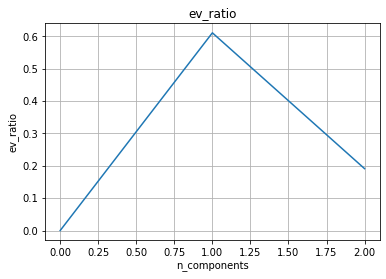

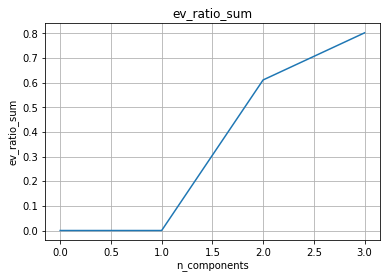

array([0.        , 0.61094186, 0.19117533])

In [89]:
#PCA
#label=df_all.label
#print(label.shape, df_all.shape)
df_all =df_all.drop('label', axis =1)
df_all

#X_train,x_test,Y_train,y_test=train_test_split(df_all, label , test_size = 0.0001, random_state = 666)
#df_allnp=df_all.values
#df_allnp.shape
#df_allnp

X_train = df_all.copy()
pca=PCA(n_components=2)
pca.fit(X_train)
pca_X=pca.transform(X_train)

print("df_all_shape:"+ str(df_all.shape))
print("X_train:"+ str(X_train.shape))
#print("Y_train:"+ str(Y_train.shape))

print("pca.singular_values_:"+ str(pca.singular_values_))
print("pca.explained_variance_ratio_:"+ str(pca.explained_variance_ratio_))
print("pca_MEAN:"+ str(pca.mean_))
print("pca_X:"+ str(pca_X))

ev_ratio = pca.explained_variance_ratio_
ev_ratio
ev_ratio = np.hstack([0,ev_ratio])
plt.title("ev_ratio")
plt.plot(ev_ratio)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio_sum = np.hstack([0,ev_ratio.cumsum()])
plt.title("ev_ratio_sum")
plt.plot(ev_ratio_sum)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio_sum')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio




In [90]:
pca_X.shape

(174, 2)

In [91]:
pca_X_list = pca_X.tolist()
pca_X_list

[[0.010867434192470085, 0.006551494567077351],
 [0.013782915595265165, 0.0015015221737496615],
 [0.03434260826496916, -0.0038270944887606063],
 [0.0002767263757581932, -0.007086158314747518],
 [0.00024544140256301135, -0.002937247960754353],
 [0.0096763872110504, -0.00011678026596286007],
 [-0.006314361292640069, -0.010066168539875572],
 [-0.003995391713348796, -0.007765258879804935],
 [0.0033130907479988923, -0.0041343405699710975],
 [0.015302758098828577, -0.0044463793586680565],
 [0.0669792450066941, 0.06247870126720874],
 [0.03976302580734415, 0.015798466929189726],
 [-0.003709673239064486, -0.0059427680710568325],
 [-0.003682048982230368, -0.011387146221117275],
 [0.018256545898678287, 0.008178430768282294],
 [0.01033374315570827, -0.007812908679451728],
 [0.006081242147085177, -0.008295714755041749],
 [0.008078766768045186, -0.004892687600135261],
 [0.025743836463616145, -0.01250354811823896],
 [0.02003231479352832, -0.0064063481404453785],
 [-0.0041515343625936575, -0.0060355589

In [92]:
df_all_decom = pd.DataFrame(pca_X_list)
df_all_decom

,0,1
0,0.010867,0.006551
1,0.013783,0.001502
2,0.034343,-0.003827
3,0.000277,-0.007086
4,0.000245,-0.002937
...,...,...
169,0.014370,-0.003751
170,-0.002522,-0.003122
171,0.011686,0.002475
172,0.004965,0.000139


In [93]:
df_decom = pd.concat([df_all_decom, df_label], axis =1)
df_decom.reset_index(drop=True, inplace=True)
#df_decom = df.fillna(0)
df_decom

,0,1,label
0,0.010867,0.006551,2
1,0.013783,0.001502,2
2,0.034343,-0.003827,2
3,0.000277,-0.007086,2
4,0.000245,-0.002937,2
...,...,...,...
169,0.014370,-0.003751,0
170,-0.002522,-0.003122,0
171,0.011686,0.002475,0
172,0.004965,0.000139,0


In [94]:
df_decom_2 = df_decom[df_decom.label == 2]
df_decom_2

,0,1,label
0,0.010867,0.006551,2
1,0.013783,0.001502,2
2,0.034343,-0.003827,2
3,0.000277,-0.007086,2
4,0.000245,-0.002937,2
...,...,...,...
64,0.039651,-0.006857,2
65,0.017082,-0.014379,2
66,0.004627,-0.002494,2
67,0.015143,-0.009243,2


In [95]:
df_decom_1 = df_decom[df_decom.label == 1]
df_decom_1 

,0,1,label
69,-0.013564,0.027316,1
70,-0.021074,0.010010,1
71,-0.036231,0.001360,1
72,-0.002012,0.008715,1
73,-0.014728,0.042058,1
74,-0.018568,0.008081,1
75,-0.000182,0.014498,1
76,-0.025809,0.009400,1
77,-0.014272,0.006656,1
78,-0.025960,0.006128,1


In [96]:
df_decom_0 = df_decom[df_decom.label == 0]
df_decom_0

,0,1,label
114,-0.000775,0.000440,0
115,0.005536,-0.000619,0
116,0.005274,0.000489,0
117,-0.008244,-0.004070,0
118,-0.015014,-0.010819,0
119,-0.010942,-0.002018,0
120,0.005922,-0.002905,0
121,-0.019386,0.001030,0
122,-0.008480,0.000876,0
123,0.006186,0.001442,0


In [97]:
df_decom_test = df_decom[df_decom.label == -1]
df_decom_test

,0,1,label
173,0.022422,-0.013571,-1


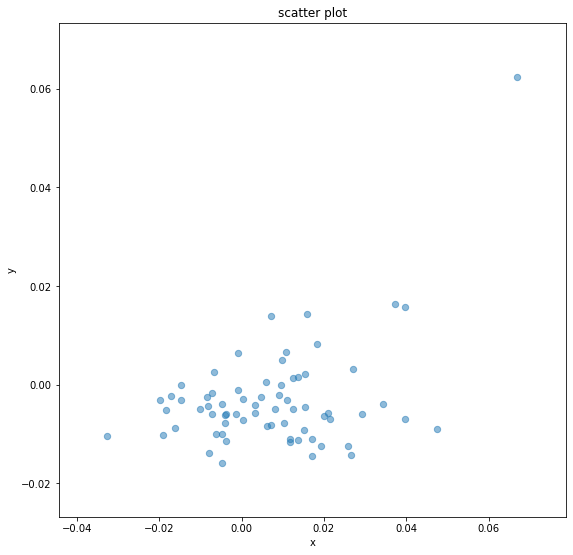

In [98]:
x,y=df_decom_2[df_decom_2.columns[0]],df_decom_2[df_decom_2.columns[1]]

label=df_decom[df_decom_2.columns[2]]

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221)
#ax2=fig.add_subplot(222)

ax1.set_title('scatter plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax1.scatter(x,y, s=40,marker='o',cmap='viridis',alpha=0.5)
#ax2.scatter(pca_X[:,0],pca_X[:,1])
plt.show()

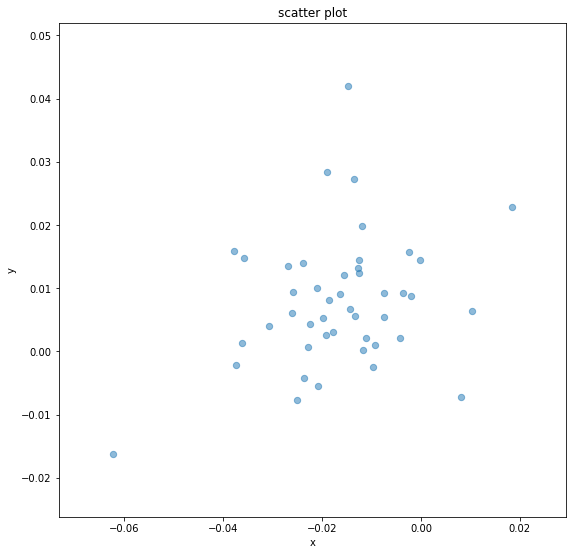

In [99]:
x,y=df_decom_1[df_decom_1.columns[0]],df_decom_1[df_decom_1.columns[1]]

label=df_decom[df_decom_1.columns[2]]

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221)
#ax2=fig.add_subplot(222)

ax1.set_title('scatter plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax1.scatter(x,y, s=40,marker='o',cmap='viridis',alpha=0.5)
#ax2.scatter(pca_X[:,0],pca_X[:,1])
plt.show()

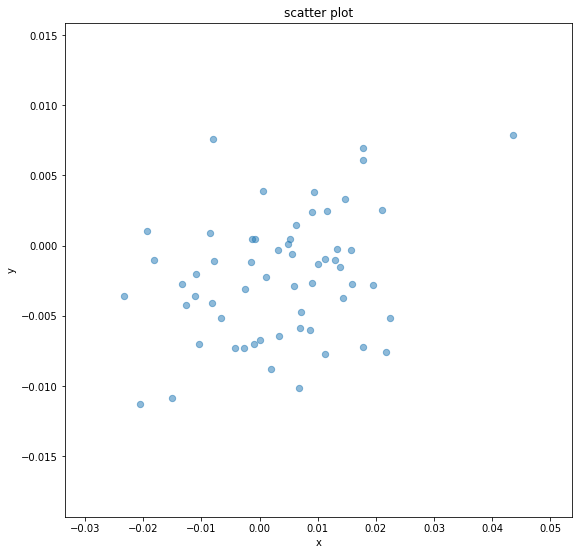

In [100]:
x,y=df_decom_0[df_decom_0.columns[0]],df_decom_0[df_decom_0.columns[1]]

label=df_decom[df_decom_0.columns[2]]

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221)
#ax2=fig.add_subplot(222)

ax1.set_title('scatter plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax1.scatter(x,y, s=40,marker='o',cmap='viridis',alpha=0.5)
#ax2.scatter(pca_X[:,0],pca_X[:,1])
plt.show()

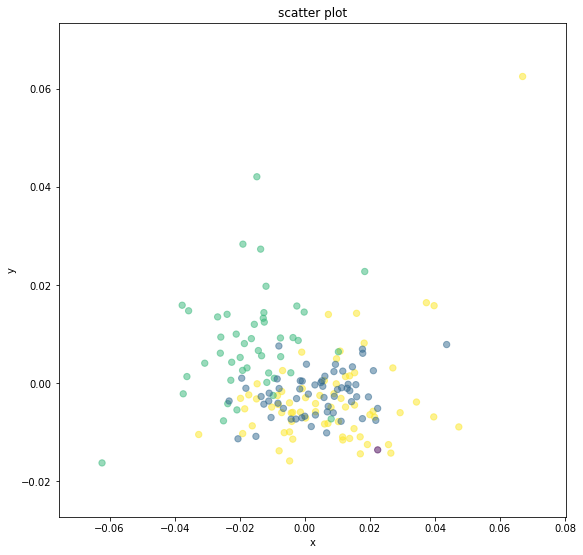

In [101]:
x,y=df_decom[df_decom.columns[0]],df_decom[df_decom.columns[1]]

label=df_decom[df_decom.columns[2]]

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221)
#ax2=fig.add_subplot(222)

ax1.set_title('scatter plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax1.scatter(x,y, c=label,s=40,marker='o',cmap='viridis',alpha=0.5)
#ax2.scatter(pca_X[:,0],pca_X[:,1])
plt.show()

# マハラノビス距離

In [102]:
import numpy as np
import matplotlib.pyplot as plt

divide = 2 #状態量の数
R = np.zeros((divide,divide))    #相関行列
invR = np.zeros((divide,divide)) #相関行列の逆行列
avg = np.zeros(divide)           #平均値
std = np.zeros(divide)           #標準偏差
make = 0

p = 0.95        #マハラノビス距離p=0.95で2σ
md_sikii = 2.448#MDの閾値95%で2.448
div = 50        #Mt楕円の分割数

def maha(x):
    global make, R, invR, avg, std

    N, _ = x.shape #Nはデータ数
    xx = np.copy(x)
    xx = np.array(xx,dtype="float32")
    x_return = []

    #各状態量から平均値を引く
    for i in range(divide):
        if make == 0:
            avg[i] = np.mean(x[:,i])
        for j in range(N):
            xx[j,i] = xx[j,i] - avg[i]

    #各状態量を標準偏差で割る
    for i in range(divide):
        if make == 0:
            std[i] = np.std(x[:,i])
        for j in range(N):
            xx[j,i] = xx[j,i] / std[i]

    #make=0のときだけ計算
    if make == 0:
        R = np.corrcoef(xx.transpose())
        invR = np.linalg.inv(R)
        make = 1

    #MD^2の計算
    for i in range(N):
        d0 = xx[i,:]
        d1 = np.dot(d0,invR)
        d2 = np.dot(d1,d0)/divide
        x_return.append(d2)

    return x_return

In [103]:
df_decom_2_copy = df_decom_2.copy()
df_decom_2_copy = df_decom_2_copy.drop('label', axis =1)
array_2 = df_decom_2_copy.to_numpy()
array_2

array([[ 0.01086743,  0.00655149],
       [ 0.01378292,  0.00150152],
       [ 0.03434261, -0.00382709],
       [ 0.00027673, -0.00708616],
       [ 0.00024544, -0.00293725],
       [ 0.00967639, -0.00011678],
       [-0.00631436, -0.01006617],
       [-0.00399539, -0.00776526],
       [ 0.00331309, -0.00413434],
       [ 0.01530276, -0.00444638],
       [ 0.06697925,  0.0624787 ],
       [ 0.03976303,  0.01579847],
       [-0.00370967, -0.00594277],
       [-0.00368205, -0.01138715],
       [ 0.01825655,  0.00817843],
       [ 0.01033374, -0.00781291],
       [ 0.00608124, -0.00829571],
       [ 0.00807877, -0.00489269],
       [ 0.02574384, -0.01250355],
       [ 0.02003231, -0.00640635],
       [-0.00415153, -0.00603556],
       [-0.00682343,  0.00257931],
       [ 0.00976633,  0.00499335],
       [ 0.02708288,  0.00311913],
       [-0.00708145, -0.0059742 ],
       [ 0.01163832, -0.01094306],
       [ 0.0137996 , -0.01124135],
       [ 0.01702735, -0.01091874],
       [ 0.02146102,

In [104]:
_ = maha(array_2)
avg_2_x = avg[0]
avg_2_y = avg[1]
print(avg_2_x ,avg_2_y)
std_2_x = std[0]
std_2_y = std[1]
print(std_2_x ,std_2_y)

0.00733093108298549 -0.0030782509689475375
0.0173985430515003 0.010595693605344257


In [105]:
df_decom_test_copy = df_decom_test.copy()
df_decom_test_copy = df_decom_test_copy.drop('label', axis =1)
array_test = df_decom_test_copy.to_numpy()
print(array_test)

#テストデータのマハラノビス距離
md_2 = maha(array_test)
md_2

[[ 0.02242163 -0.01357138]]


[1.5129320744654482]

In [106]:
divide = 2 #状態量の数
R = np.zeros((divide,divide))    #相関行列
invR = np.zeros((divide,divide)) #相関行列の逆行列
avg = np.zeros(divide)           #平均値
std = np.zeros(divide)           #標準偏差
make = 0

df_decom_1_copy = df_decom_1.copy()
df_decom_1_copy = df_decom_1_copy.drop('label', axis =1)
array_1 = df_decom_1_copy.to_numpy()
array_1

array([[-0.01356358,  0.02731609],
       [-0.02107424,  0.01000953],
       [-0.03623056,  0.00136004],
       [-0.00201193,  0.00871478],
       [-0.01472772,  0.0420582 ],
       [-0.01856846,  0.00808075],
       [-0.00018207,  0.01449824],
       [-0.02580888,  0.00940003],
       [-0.01427188,  0.00665582],
       [-0.02595957,  0.00612817],
       [-0.0132697 ,  0.00559865],
       [-0.0376909 ,  0.01589121],
       [-0.00428387,  0.00212962],
       [-0.0267908 ,  0.01351095],
       [-0.02367291, -0.00416185],
       [-0.01901122,  0.02833428],
       [ 0.01033278,  0.0064106 ],
       [-0.01775266,  0.0031245 ],
       [-0.01985748,  0.00525215],
       [-0.00740478,  0.005417  ],
       [-0.01911911,  0.00261627],
       [-0.00747216,  0.0092236 ],
       [-0.02388095,  0.01404087],
       [-0.06232481, -0.01622747],
       [-0.01191452,  0.01975821],
       [ 0.00812256, -0.00726235],
       [-0.01256386,  0.01438855],
       [-0.00971811, -0.00249075],
       [-0.02498372,

In [107]:
_ = maha(array_1)
#print(_)
avg_1_x = avg[0]
avg_1_y = avg[1]
print(avg_1_x ,avg_1_y)
std_1_x = std[0]
std_1_y = std[1]
print(std_1_x ,std_1_y)

-0.016497780328364367 0.007914156645543333
0.013739595276329307 0.010207193348371238


In [108]:
df_decom_test_copy = df_decom_test.copy()
df_decom_test_copy = df_decom_test_copy.drop('label', axis =1)
array_test = df_decom_test_copy.to_numpy()
print(array_test)

#テストデータのマハラノビス距離
md_1 = maha(array_test)
md_1

[[ 0.02242163 -0.01357138]]


[8.486709876983635]

In [109]:
df_decom_0_copy = df_decom_0.copy()
df_decom_0_copy = df_decom_0_copy.drop('label', axis =1)
array_0 = df_decom_0_copy.to_numpy()
array_0

array([[-7.74634716e-04,  4.39556284e-04],
       [ 5.53564613e-03, -6.19049982e-04],
       [ 5.27429626e-03,  4.89321868e-04],
       [-8.24381277e-03, -4.06989103e-03],
       [-1.50135958e-02, -1.08187828e-02],
       [-1.09415668e-02, -2.01757012e-03],
       [ 5.92189372e-03, -2.90541459e-03],
       [-1.93857703e-02,  1.02980193e-03],
       [-8.48029508e-03,  8.75893163e-04],
       [ 6.18644090e-03,  1.44199859e-03],
       [-2.72533509e-03, -7.28874856e-03],
       [ 6.93041489e-03, -5.83404602e-03],
       [ 5.15079023e-04,  3.87554829e-03],
       [ 1.05291343e-05, -6.71542157e-03],
       [-1.03614683e-02, -6.97264252e-03],
       [-1.10748280e-02, -3.61982195e-03],
       [ 2.24056253e-02, -5.12661577e-03],
       [ 4.36143382e-02,  7.88176889e-03],
       [ 3.12856552e-03, -3.40801651e-04],
       [-1.80969793e-02, -1.01894816e-03],
       [ 1.99968497e-03, -8.81516831e-03],
       [-7.95542068e-03,  7.58939133e-03],
       [-1.53633426e-03, -1.16689637e-03],
       [-1.

In [110]:
divide = 2 #状態量の数
R = np.zeros((divide,divide))    #相関行列
invR = np.zeros((divide,divide)) #相関行列の逆行列
avg = np.zeros(divide)           #平均値
std = np.zeros(divide)           #標準偏差
make = 0

_ = maha(array_0)
avg_0_x = avg[0]
avg_0_y = avg[1]
print(avg_0_x ,avg_0_y)
std_0_x = std[0]
std_0_y = std[1]
print(std_0_x ,std_0_y)

0.0036295633683601043 -0.0022062092919965
0.012630204143835257 0.004422898731315409


In [111]:
df_decom_test_copy = df_decom_test.copy()
df_decom_test_copy = df_decom_test_copy.drop('label', axis =1)
array_test = df_decom_test_copy.to_numpy()
print(array_test)

#テストデータのマハラノビス距離
md_0 = maha(array_test)
md_0

[[ 0.02242163 -0.01357138]]


[6.217658855585603]

In [112]:
array_2.shape, array_1.shape, array_0.shape, array_test

((69, 2), (45, 2), (59, 2), array([[ 0.02242163, -0.01357138]]))

In [113]:
df_decom_0

,0,1,label
114,-0.000775,0.000440,0
115,0.005536,-0.000619,0
116,0.005274,0.000489,0
117,-0.008244,-0.004070,0
118,-0.015014,-0.010819,0
119,-0.010942,-0.002018,0
120,0.005922,-0.002905,0
121,-0.019386,0.001030,0
122,-0.008480,0.000876,0
123,0.006186,0.001442,0


In [114]:
array_0

array([[-7.74634716e-04,  4.39556284e-04],
       [ 5.53564613e-03, -6.19049982e-04],
       [ 5.27429626e-03,  4.89321868e-04],
       [-8.24381277e-03, -4.06989103e-03],
       [-1.50135958e-02, -1.08187828e-02],
       [-1.09415668e-02, -2.01757012e-03],
       [ 5.92189372e-03, -2.90541459e-03],
       [-1.93857703e-02,  1.02980193e-03],
       [-8.48029508e-03,  8.75893163e-04],
       [ 6.18644090e-03,  1.44199859e-03],
       [-2.72533509e-03, -7.28874856e-03],
       [ 6.93041489e-03, -5.83404602e-03],
       [ 5.15079023e-04,  3.87554829e-03],
       [ 1.05291343e-05, -6.71542157e-03],
       [-1.03614683e-02, -6.97264252e-03],
       [-1.10748280e-02, -3.61982195e-03],
       [ 2.24056253e-02, -5.12661577e-03],
       [ 4.36143382e-02,  7.88176889e-03],
       [ 3.12856552e-03, -3.40801651e-04],
       [-1.80969793e-02, -1.01894816e-03],
       [ 1.99968497e-03, -8.81516831e-03],
       [-7.95542068e-03,  7.58939133e-03],
       [-1.53633426e-03, -1.16689637e-03],
       [-1.

In [115]:
#楕円のデータ
low_2 = np.corrcoef(array_2[:,0],array_2[:,1])[0,1]
low_1 = np.corrcoef(array_1[:,0],array_1[:,1])[0,1]
low_0 = np.corrcoef(array_0[:,0],array_0[:,1])[0,1]
low_2, low_1, low_0

(0.4287580287069833, 0.2729147152237661, 0.3134522429295313)

In [116]:
#楕円半径の計算　Poe 
#p=0.95に対応する楕円

curve_c_2 = np.zeros((2,div+1))
for i in range(div+1):
    r = (-2*(1-low_2**2)*np.log(1-p)/(1-2*low_2*np.sin(i*2*np.pi/div)*np.cos(i*2*np.pi/div)))**0.5
    curve_c_2[0,i] = avg_2_x + std_2_x *r*np.cos(i*2*np.pi/div)
    curve_c_2[1,i] = avg_2_y + std_2_y *r*np.sin(i*2*np.pi/div)
    
    print(r)
curve_c_2

2.211341892551258
2.339589550744184
2.48254818328673
2.630881989999326
2.768533396274097
2.873504190139049
2.9236438297722125
2.9065510552754628
2.8265918564445136
2.7023177387482296
2.556879241629266
2.4096704355332177
2.2732652257144546
2.1542179916015773
2.0550968899939988
1.9762899789094104
1.9172144513889198
1.8770190974725134
1.8549570745511734
1.8505685447186397
1.8637581673371562
1.8948086836917855
1.9443382780394107
2.013178091837635
2.1021084026253263
2.211341892551258
2.339589550744184
2.48254818328673
2.630881989999326
2.768533396274097
2.873504190139049
2.923643829772213
2.9065510552754628
2.8265918564445136
2.7023177387482287
2.5568792416292663
2.4096704355332172
2.273265225714454
2.154217991601578
2.055096889993999
1.9762899789094104
1.9172144513889202
1.8770190974725134
1.8549570745511734
1.8505685447186397
1.8637581673371562
1.8948086836917852
1.944338278039411
2.013178091837635
2.102108402625326
2.2113418925512573


array([[ 4.58050582e-02,  4.77154060e-02,  4.91666738e-02,
         4.98900677e-02,  4.95412634e-02,  4.77775629e-02,
         4.44114825e-02,  3.95653052e-02,  3.36821320e-02,
         2.73495370e-02,  2.10778529e-02,  1.51868468e-02,
         9.81439050e-03,  4.97752643e-03,  6.30982565e-04,
        -3.29448424e-03, -6.87167726e-03, -1.01677776e-02,
        -1.32410043e-02, -1.61398151e-02, -1.89028014e-02,
        -2.15581928e-02, -2.41221552e-02, -2.65950169e-02,
        -2.89542985e-02, -3.11431960e-02, -3.30535438e-02,
        -3.45048116e-02, -3.52282055e-02, -3.48794012e-02,
        -3.31157007e-02, -2.97496204e-02, -2.49034431e-02,
        -1.90202699e-02, -1.26876748e-02, -6.41599076e-03,
        -5.24984587e-04,  4.84747167e-03,  9.68433573e-03,
         1.40308796e-02,  1.79563464e-02,  2.15335394e-02,
         2.48296398e-02,  2.79028664e-02,  3.08016772e-02,
         3.35646636e-02,  3.62200549e-02,  3.87840174e-02,
         4.12568791e-02,  4.36161607e-02,  4.58050582e-0

In [117]:
#楕円半径の計算　Poe 
#p=0.95に対応する楕円

curve_c_1 = np.zeros((2,div+1))
for i in range(div+1):
    r = (-2*(1-low_1**2)*np.log(1-p)/(1-2*low_1*np.sin(i*2*np.pi/div)*np.cos(i*2*np.pi/div)))**0.5
    curve_c_1[0,i] = avg_1_x + std_1_x *r*np.cos(i*2*np.pi/div)
    curve_c_1[1,i] = avg_1_y + std_1_y *r*np.sin(i*2*np.pi/div)
    
    print(r)
curve_c_1

2.354826031316774
2.43905081458902
2.5267852488535305
2.6113571836668856
2.684322098064271
2.7366112345706672
2.7606120171679165
2.752499268400881
2.7135899122314053
2.649863298687237
2.569961136637947
2.482848287326294
2.3961633184537394
2.3155568711296386
2.244762474192195
2.186009853633999
2.1404993974651982
2.1088026671773537
2.0911509862046067
2.087618144784659
2.098214385508712
2.12290450115588
2.1615528322138244
2.213787010848124
2.278764291383111
2.354826031316774
2.43905081458902
2.52678524885353
2.6113571836668856
2.6843220980642712
2.7366112345706672
2.7606120171679165
2.752499268400881
2.7135899122314053
2.6498632986872366
2.569961136637947
2.482848287326294
2.3961633184537394
2.3155568711296386
2.244762474192195
2.186009853633999
2.1404993974651987
2.1088026671773537
2.0911509862046067
2.087618144784659
2.098214385508712
2.1229045011558796
2.1615528322138244
2.213787010848124
2.278764291383111
2.3548260313167737


array([[ 0.01585658,  0.01674954,  0.01712853,  0.01686166,  0.01582172,
         0.0139212 ,  0.01115178,  0.00760846,  0.00347979, -0.00099599,
        -0.00558632, -0.01010558, -0.01443057, -0.01849545, -0.02227702,
        -0.02577907, -0.02901978, -0.03202288, -0.03481197, -0.03740681,
        -0.03982062, -0.04205776, -0.04411108, -0.04595873, -0.0475602 ,
        -0.04885214, -0.0497451 , -0.05012409, -0.04985722, -0.04881728,
        -0.04691676, -0.04414734, -0.04060402, -0.03647535, -0.03199957,
        -0.02740924, -0.02288998, -0.01856499, -0.01450011, -0.01071854,
        -0.00721649, -0.00397578, -0.00097268,  0.00181641,  0.00441125,
         0.00682506,  0.0090622 ,  0.01111552,  0.01296317,  0.01456464,
         0.01585658],
       [ 0.00791416,  0.01103444,  0.01432821,  0.01772638,  0.02111392,
         0.02433283,  0.02720339,  0.02956195,  0.03130047,  0.03238762,
         0.03286236,  0.03280818,  0.032324  ,  0.03150285,  0.03042103,
         0.0291351 ,  0.02768

In [118]:
#楕円半径の計算　Poe 
#p=0.95に対応する楕円

curve_c_0 = np.zeros((2,div+1))
for i in range(div+1):
    r = (-2*(1-low_0**2)*np.log(1-p)/(1-2*low_0*np.sin(i*2*np.pi/div)*np.cos(i*2*np.pi/div)))**0.5
    curve_c_0[0,i] = avg_0_x + std_0_x *r*np.cos(i*2*np.pi/div)
    curve_c_0[1,i] = avg_0_y + std_0_y *r*np.sin(i*2*np.pi/div)
    
    print(r)
curve_c_0

2.324390097095198
2.4206519320867375
2.5226494392463548
2.6227449230356537
2.710590314962972
2.774436158950256
2.8040005557501777
2.7939886426176215
2.7462325546518813
2.6689269878552966
2.5735256842914134
2.4713426449561613
2.371438973046861
2.2800348306101252
2.2008768740880913
2.135938164195792
2.086086502608201
2.0515909149369373
2.0324586702171663
2.028636127958659
2.0401078888077726
2.0669155344012955
2.109100314204274
2.166556791105878
2.238768687400318
2.324390097095198
2.4206519320867375
2.5226494392463548
2.6227449230356537
2.710590314962972
2.7744361589502557
2.8040005557501777
2.793988642617621
2.7462325546518813
2.6689269878552966
2.5735256842914134
2.4713426449561613
2.3714389730468604
2.2800348306101257
2.2008768740880913
2.135938164195792
2.086086502608201
2.0515909149369373
2.0324586702171663
2.028636127958659
2.0401078888077726
2.066915534401295
2.109100314204274
2.166556791105878
2.2387686874003174
2.324390097095198


array([[ 0.03298708,  0.03396181,  0.03449015,  0.03442916,  0.03363019,
         0.03197889,  0.02944606,  0.02612339,  0.02221497,  0.0179822 ,
         0.0136739 ,  0.0094784 ,  0.00551025,  0.00182137, -0.00157917,
        -0.00470689, -0.00758874, -0.01025479, -0.01273334, -0.01504814,
        -0.01721636, -0.01924692, -0.02113816, -0.0228748 , -0.02442358,
        -0.02572796, -0.02670268, -0.02723102, -0.02717003, -0.02637107,
        -0.02471976, -0.02218693, -0.01886427, -0.01495585, -0.01072307,
        -0.00641477, -0.00221927,  0.00174888,  0.00543776,  0.0088383 ,
         0.01196602,  0.01484787,  0.01751391,  0.01999247,  0.02230726,
         0.02447549,  0.02650604,  0.02839729,  0.03013393,  0.0316827 ,
         0.03298708],
       [-0.00220621, -0.00086435,  0.00056853,  0.00206409,  0.00356937,
         0.00500653,  0.00628341,  0.00731543,  0.00804926,  0.00847473,
         0.00861914,  0.00853068,  0.00826173,  0.00785825,  0.00735563,
         0.00677846,  0.00614

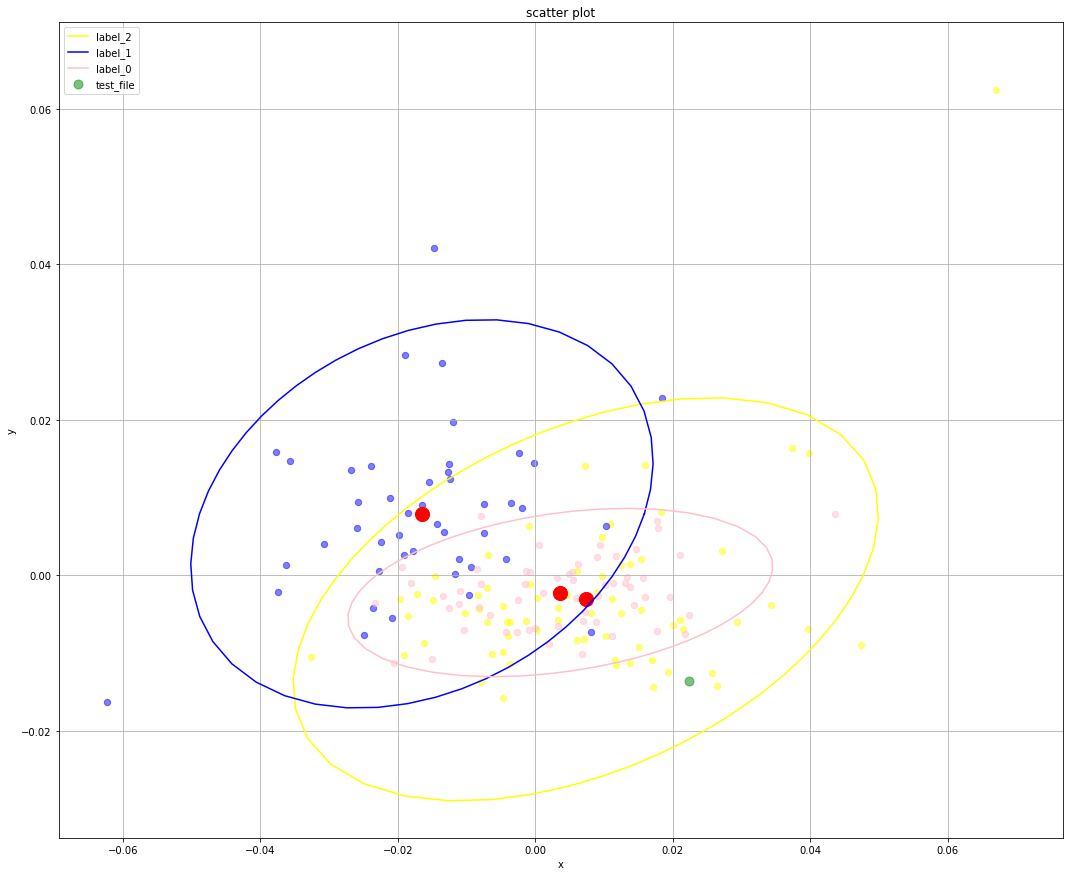

In [119]:
my_makedirs(new_dir_path_png_decom_dim2)

x_2,y_2=df_decom_2[df_decom_2.columns[0]],df_decom_2[df_decom_2.columns[1]]
label_2=df_decom_2[df_decom_2.columns[2]]

x_1,y_1=df_decom_1[df_decom_1.columns[0]],df_decom_1[df_decom_1.columns[1]]
label_1=df_decom_1[df_decom_1.columns[2]]


x_0,y_0=df_decom_0[df_decom_0.columns[0]],df_decom_0[df_decom_0.columns[1]]
label_0=df_decom_0[df_decom_0.columns[2]]

x_test,y_test=df_decom_test[df_decom_test.columns[0]],df_decom_test[df_decom_test.columns[1]]
label_test=df_decom_test[df_decom_test.columns[2]]

fig=plt.figure(figsize=(18,15))
ax1=fig.add_subplot()
#ax2=fig.add_subplot(222)

ax1.set_title('scatter plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.scatter(x_2,y_2, c='yellow', s=40, marker='o',alpha=0.5)
ax1.plot(curve_c_2[0],curve_c_2[1],c="yellow",label="label_2")

ax1.scatter(x_1,y_1, c='blue', s=40, marker='o',alpha=0.5)
ax1.plot(curve_c_1[0],curve_c_1[1],c="b",label="label_1")

ax1.scatter(x_0,y_0, c='pink', s=40,marker='o',alpha=0.5)
ax1.plot(curve_c_0[0],curve_c_0[1],c="pink",label="label_0")

ax1.scatter(x_test,y_test, c='green', s=80,marker='o',cmap='viridis',alpha=0.5, label='test_file')


ax1.scatter([avg_2_x], [avg_2_y], c="red", s=200)
ax1.scatter([avg_1_x], [avg_1_y], c="red", s=200)
ax1.scatter([avg_0_x], [avg_0_y], c="red", s=200)
ax1.grid(True)
ax1.legend(loc='upper left')


#ax2.scatter(pca_X[:,0],pca_X[:,1])
#plt.show()



#将来的に各特徴量にリスト化
#title_ =  ("No." + str(i)+ str('_')+str(j) +str('_')
               #+ str(data_list[2].columns[combi[0]])+ str('_')+str(data_list[2].columns[combi[1]]) )

title_ =  ("decomposition" + str('poe')+ str('twain')+str('letter') +str('_')
               + str('test')+ str('_')+str('02') )
   
    
filename = new_dir_path_png_decom_dim2 + "/" + title_ +".png"
plt.savefig(filename)

No handles with labels found to put in legend.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


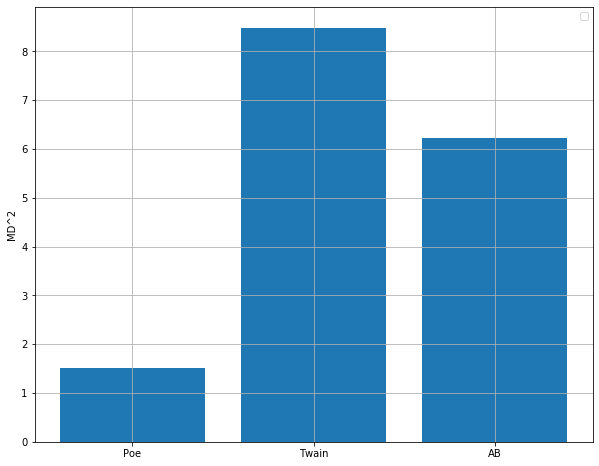

In [120]:
#可視化
plt.figure(figsize = (10,8))
plt.legend()

plt.subplot()
plt.bar([1,2,3], [md_2[0], md_1[0], md_0[0]], align="center")

plt.xticks([1,2, 3], ["Poe", "Twain",'AB'])
plt.ylabel("MD^2")
plt.grid(True)

filename = new_dir_path_png_decom_dim2 + "/" + title_ +"bar.png"
plt.savefig(filename)

# adapt the result into EM -algorithm

In [121]:
#adapt the result into EM -algorithm
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [122]:

x,y=df_decom[df_decom.columns[0]],df_decom[df_decom.columns[1]]

label=df_decom[df_decom.columns[2]]


In [123]:
x.shape, y.shape, label.shape

((174,), (174,), (174,))

In [124]:
x, y, label

(0      0.010867
 1      0.013783
 2      0.034343
 3      0.000277
 4      0.000245
          ...   
 169    0.014370
 170   -0.002522
 171    0.011686
 172    0.004965
 173    0.022422
 Name: 0, Length: 174, dtype: float64,
 0      0.006551
 1      0.001502
 2     -0.003827
 3     -0.007086
 4     -0.002937
          ...   
 169   -0.003751
 170   -0.003122
 171    0.002475
 172    0.000139
 173   -0.013571
 Name: 1, Length: 174, dtype: float64,
 0      2
 1      2
 2      2
 3      2
 4      2
       ..
 169    0
 170    0
 171    0
 172    0
 173   -1
 Name: label, Length: 174, dtype: int64)

In [125]:
df_decom_ = df_decom.copy()
df_decom_xy = df_decom_[[0,1]]
decom_xy_array = df_decom_xy.to_numpy()
decom_xy_array

array([[ 1.08674342e-02,  6.55149457e-03],
       [ 1.37829156e-02,  1.50152217e-03],
       [ 3.43426083e-02, -3.82709449e-03],
       [ 2.76726376e-04, -7.08615831e-03],
       [ 2.45441403e-04, -2.93724796e-03],
       [ 9.67638721e-03, -1.16780266e-04],
       [-6.31436129e-03, -1.00661685e-02],
       [-3.99539171e-03, -7.76525888e-03],
       [ 3.31309075e-03, -4.13434057e-03],
       [ 1.53027581e-02, -4.44637936e-03],
       [ 6.69792450e-02,  6.24787013e-02],
       [ 3.97630258e-02,  1.57984669e-02],
       [-3.70967324e-03, -5.94276807e-03],
       [-3.68204898e-03, -1.13871462e-02],
       [ 1.82565459e-02,  8.17843077e-03],
       [ 1.03337432e-02, -7.81290868e-03],
       [ 6.08124215e-03, -8.29571476e-03],
       [ 8.07876677e-03, -4.89268760e-03],
       [ 2.57438365e-02, -1.25035481e-02],
       [ 2.00323148e-02, -6.40634814e-03],
       [-4.15153436e-03, -6.03555899e-03],
       [-6.82342775e-03,  2.57931324e-03],
       [ 9.76633008e-03,  4.99335170e-03],
       [ 2.

In [126]:
labels_array = df_decom_.label.to_numpy()
labels_array

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1], dtype=int64)

In [127]:
n_classes = len(np.unique(labels_array))-1
n_classes

3

In [128]:
array_1.shape[0], array_0.shape[0]

(45, 59)

In [129]:
data_set = [array_2, array_1, array_0]
len(data_set), data_set

(3,
 [array([[ 0.01086743,  0.00655149],
         [ 0.01378292,  0.00150152],
         [ 0.03434261, -0.00382709],
         [ 0.00027673, -0.00708616],
         [ 0.00024544, -0.00293725],
         [ 0.00967639, -0.00011678],
         [-0.00631436, -0.01006617],
         [-0.00399539, -0.00776526],
         [ 0.00331309, -0.00413434],
         [ 0.01530276, -0.00444638],
         [ 0.06697925,  0.0624787 ],
         [ 0.03976303,  0.01579847],
         [-0.00370967, -0.00594277],
         [-0.00368205, -0.01138715],
         [ 0.01825655,  0.00817843],
         [ 0.01033374, -0.00781291],
         [ 0.00608124, -0.00829571],
         [ 0.00807877, -0.00489269],
         [ 0.02574384, -0.01250355],
         [ 0.02003231, -0.00640635],
         [-0.00415153, -0.00603556],
         [-0.00682343,  0.00257931],
         [ 0.00976633,  0.00499335],
         [ 0.02708288,  0.00311913],
         [-0.00708145, -0.0059742 ],
         [ 0.01163832, -0.01094306],
         [ 0.0137996 , -0.01124135

In [130]:
X_train, X_test, y_train, y_test = train_test_split(decom_xy_array, labels_array, test_size=0.2, random_state=42)

In [131]:
X_train, x_test

(array([[-0.0150136 , -0.01081878],
        [-0.01257506, -0.00425985],
        [ 0.01595575, -0.0027527 ],
        [-0.00468865, -0.00398898],
        [-0.02325897, -0.00361486],
        [-0.01276307,  0.01324592],
        [ 0.01514319, -0.00924283],
        [ 0.01772909,  0.00694474],
        [ 0.03434261, -0.00382709],
        [-0.01641556,  0.00908707],
        [ 0.00876138, -0.00601851],
        [ 0.00943503,  0.00384717],
        [-0.00018207,  0.01449824],
        [-0.01166246,  0.00017276],
        [ 0.0137996 , -0.01124135],
        [ 0.00897125,  0.00237701],
        [-0.00747216,  0.0092236 ],
        [ 0.00553565, -0.00061905],
        [-0.01356358,  0.02731609],
        [-0.01845393, -0.0052145 ],
        [ 0.01033278,  0.0064106 ],
        [ 0.00976633,  0.00499335],
        [-0.00137688,  0.00050146],
        [-0.00971811, -0.00249075],
        [ 0.03738816,  0.01640671],
        [ 0.01007302, -0.00127454],
        [ 0.03976303,  0.01579847],
        [-0.02498372, -0.007

In [132]:
# Try GMMs using different types of covariances.
estimators = {cov_type_: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type_, max_iter=20000, random_state=50)
              for cov_type_ in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

In [133]:
x_mistory,y_mistory = df_decom_test.to_numpy()[0][0], df_decom_test.to_numpy()[0][1]
x_mistory,y_mistory

(0.0224216313171512, -0.013571383964275872)

In [134]:
print(__doc__)

colors = ['navy', 'turquoise','green']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
            
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        
        

Automatically created module for IPython interactive environment


GaussianMixture(covariance_type='spherical', init_params='kmeans',
                max_iter=20000,
                means_init=array([[ 0.00360299, -0.00202756],
       [-0.01643289,  0.00765776],
       [ 0.0085185 , -0.00243715]]),
                n_components=3, n_init=1, precisions_init=None, random_state=50,
                reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
                warm_start=False, weights_init=None)
[[ 0.01086743  0.00655149]
 [ 0.01378292  0.00150152]
 [ 0.03434261 -0.00382709]
 [ 0.00027673 -0.00708616]
 [ 0.00024544 -0.00293725]
 [ 0.00967639 -0.00011678]
 [-0.00631436 -0.01006617]
 [-0.00399539 -0.00776526]
 [ 0.00331309 -0.00413434]
 [ 0.01530276 -0.00444638]
 [ 0.06697925  0.0624787 ]
 [ 0.03976303  0.01579847]
 [-0.00370967 -0.00594277]
 [-0.00368205 -0.01138715]
 [ 0.01825655  0.00817843]
 [ 0.01033374 -0.00781291]
 [ 0.00608124 -0.00829571]
 [ 0.00807877 -0.00489269]
 [ 0.02574384 -0.01250355]
 [ 0.02003231 -0.00640635]
 [-0.00415153 -0.

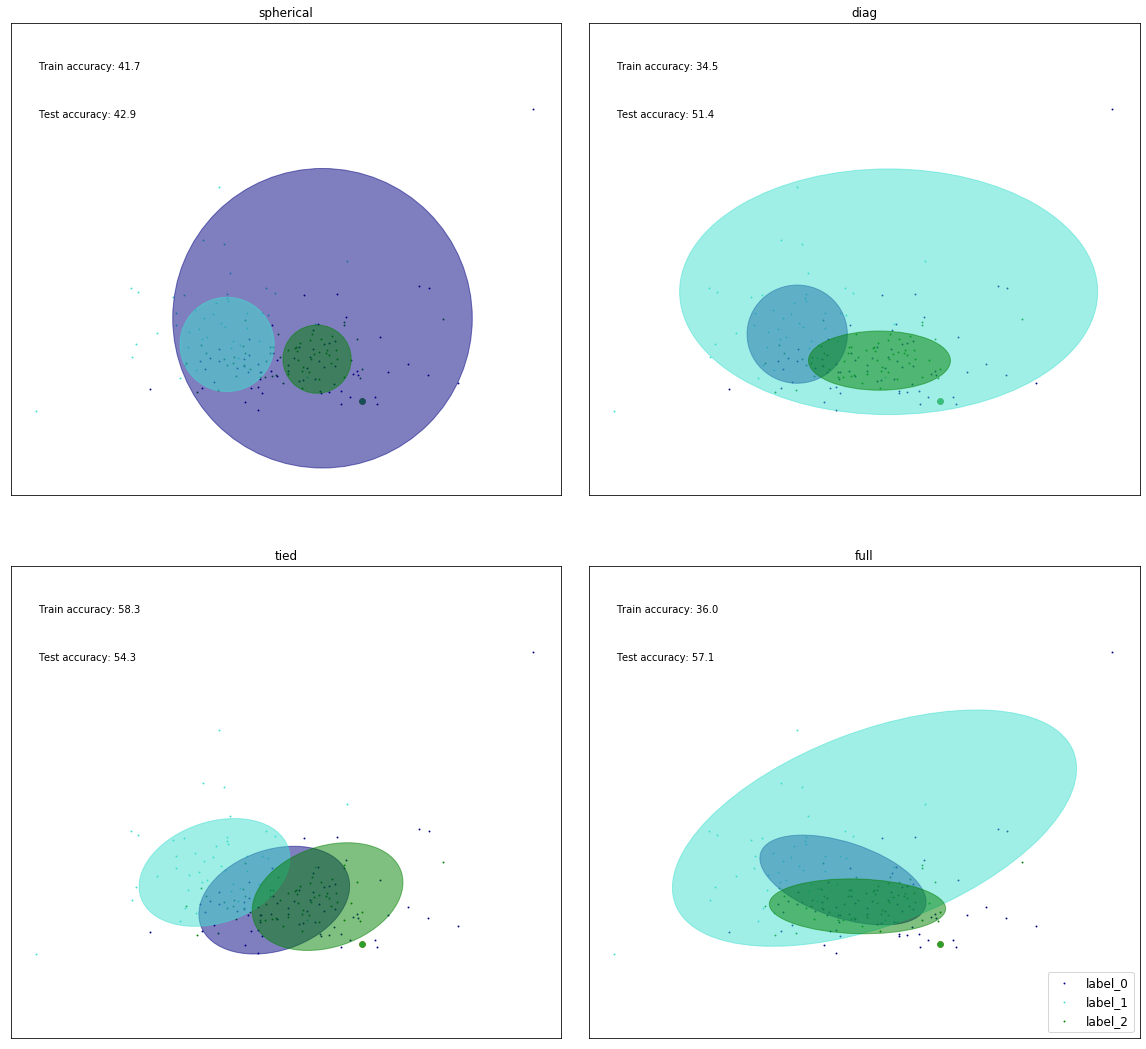

In [135]:
my_makedirs(new_dir_path_png_decom_dim2_EM)

plt.figure(figsize=(8 * n_estimators // 2, 15))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    #print(index, name, estimator)
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])
    
    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)
    print(estimator.fit(X_train))
    
    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    
    #Plot train dataset
    for n, color in enumerate(colors):
        #data = iris.data[iris.target == n]
        data = data_set[n]
        print(data)
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,label='label_' +str(n))
        

    
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        data = data_set[n]
        #plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)
        
        plt.scatter(x_mistory,y_mistory, s=30.0, marker='o',cmap='red')
    

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

filename = new_dir_path_png_decom_dim2_EM + "/" + title_ +".png"
plt.savefig(filename)
    
    
    
    

In [136]:
df_decom_test.to_numpy()[0][0]

0.0224216313171512

In [137]:
cc

NameError: name 'cc' is not defined

# 次元圧縮しないバージョン

In [ ]:
#PCA


#X_train,x_test,Y_train,y_test=train_test_split(datanp,label , test_size = 0.3, random_state = 666)
#datanp=data.values
#datanp.shape
#datanp


pca=PCA()
pca.fit(X_train)

pca_X=pca.transform(X_train)

#print("datanp:"+ str(datanp.shape))
print("X_train:"+ str(X_train.shape))
print("Y_train:"+ str(Y_train.shape))

print("pca.singular_values_:"+ str(pca.singular_values_))
print("pca.explained_variance_ratio_:"+ str(pca.explained_variance_ratio_))
print("pca_MEAN:"+ str(pca.mean_))
print("pca_X:"+ str(pca_X))

ev_ratio = pca.explained_variance_ratio_
ev_ratio
ev_ratio = np.hstack([0,ev_ratio])
plt.title("ev_ratio")
plt.plot(ev_ratio)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio_sum = np.hstack([0,ev_ratio.cumsum()])
plt.title("ev_ratio_sum")
plt.plot(ev_ratio_sum)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio_sum')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio

In [ ]:
data_features= data_.columns
data_features

In [ ]:
index=[0]
ev_ratio_array= np.delete(ev_ratio,index)

variance_ratio = pd.DataFrame(ev_ratio_array,index=data_features, columns=["variance_ratio"])

variance_ratio.plot.bar(figsize=(8, 5), color='yellow')
plt.title("ev_ratio")
groupin_variance_ratio=1.0-variance_ratio

groupin_variance_ratio.plot.bar(figsize=(8, 5), color='blue')
plt.title("1.0-ev_ratio")
plt.savefig('figure.png')

In [ ]:
variance_ratio

In [ ]:
groupin_variance_ratio

In [ ]:
groupin_variance_ratio.sort_values('variance_ratio', ascending=False)

In [ ]:
cc

# LogisticRegression

In [ ]:
pca=PCA(n_components=3)
lr = LogisticRegression()
X_trainnp= pca_X

lr.fit(X_train, Y_train)
X_train.shape,Y_train.shape
X_train

In [ ]:
prediction= lr.predict(x_test)
prediction
score = accuracy_score(prediction,y_test)
score

In [ ]:
X=datanp
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221,projection='3d')
#ax2=fig.add_subplot(222)

#color=['red','green','blue']
#ax1.scatter3D(X[:,0],X[:,1],X[:,2])
ax1.scatter3D(pca_X[:,0],pca_X[:,1],pca_X[:,2])
#ax2.scatter(pca_X[:,0],pca_X[:,1])

plt.show()

# VAL

In [ ]:
data_val

In [ ]:
data_val = data_val.drop(data_val.columns[0],axis=1)
#data_val = data_val.drop(data_val.columns[0],axis=1)
data_val

In [ ]:
data_val.columns[0], data_val.columns

In [ ]:
data_val = data_val.drop(data_val.columns[0],axis=1)
#data_val = data_val.drop(data_val.columns[0],axis=1)
data_val

In [ ]:
x_train

In [ ]:
pred=clf.predict(data_val)
pred

In [ ]:
features=X_train.columns
importances=clf.feature_importances_
indices=np.argsort(importances)
importances,indices

plt.figure(figsize=(5,5))
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [ ]:
importances=clf.feature_importances_
indices=np.argsort(importances)
importances,indices

In [ ]:
plt.figure(figsize=(5,5))
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [ ]:
import itertools
l = ['a', 'b', 'c', 'd']

c = itertools.combinations(l, 2)

print(type(c))
# <class 'itertools.combinations'>

for v in itertools.combinations(l, 2):
    print(v)
# ('a', 'b')
# ('a', 'c')
# ('a', 'd')
# ('b', 'c')
# ('b', 'd')
# ('c', 'd')

c_list = list(itertools.combinations(l, 2))

print(c_list)
# [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

print(len(c_list))
# 6